# **Branching Out: Customer Conversion Prediction with Decision Trees vs. Random Forests**

## **I. Problem Definition**

### **i. Context**

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

The customer interacts with the marketing front on social media or other online platforms.
The customer browses the website/app and downloads the brochure
The customer connects through emails for more information.
The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

---

### **ii. Objective**

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
- Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
- Find the factors driving the lead conversion process
- Create a profile of the leads which are likely to convert

---

### **iii. Data Description**

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

---

### **iv. Liberary Import**

In [10]:
# ---- Overall ----
# Ignore warnings.
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# ---- II. Initial Data Treatment ----
# Implement data manipulation.
import pandas as pd
import numpy as np
# Remove the limit for the number of displayed columns.
pd.set_option("display.max_columns", None)
# Set the limit for the number of displayed rows.
pd.set_option("display.max_rows", 200)
# Set the precision of floating numbers to 5 decimal points.
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# ---- III. Exploratory Data Analysis (EDA) ----
# Implement data data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# ---- IV. Modelling ----
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split
# Import skew.
from scipy.stats import skew
# Import statistics models.
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
# Import classifiers.
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
# Tune different models.
from sklearn.model_selection import GridSearchCV
# Import different metric scores.
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
# Import metrics to evaluate the model
from sklearn import metrics

## **II. Initial Data Treatment**

### **i. Preparations**

In [13]:
# Load the dataset into a DataFrame.
learn = pd.read_csv('ExtraaLearn.csv')
# Create an operatable copy of the DataFrame.
data = learn.copy()

### **ii. Data Overview**

In [15]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [16]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


In [17]:
data.shape

(4612, 15)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [19]:
data.duplicated().sum()

0

In [20]:
data.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [21]:
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


### **iii. Observations and Sanity Check**

👓 **Structure Overview**
- Dataset contains **4,612 rows** and **15 columns**.  
- Memory usage: ~540 KB.  
- Column types:  
  - **Numeric**: 4 integers (`age`, `website_visits`, `time_spent_on_website`, `status`) and 1 float (`page_views_per_visit`).  
  - **Categorical/Object**: 10 columns (`ID`, `current_occupation`, `first_interaction`, `profile_completed`, `last_activity`, `print_media_type1`, `print_media_type2`, `digital_media`, `educational_channels`, `referral`).

---

☑️ **Data Quality Check**
- **Missing values**: None across all columns.  
- **Duplicates**: None found.  
- ✅ Data is clean and complete.

---

🔢 **Cardinality / Uniqueness**
- **High uniqueness**:  
  - `ID` → 4,612 unique (identifier).  
  - `time_spent_on_website` → 1,623 unique.  
  - `page_views_per_visit` → 2,414 unique.  
- **Medium uniqueness**:  
  - `age` → 46 unique values.  
  - `website_visits` → 27 unique values.  
- **Low uniqueness (categorical features)**:  
  - `current_occupation` → 3  
  - `first_interaction` → 2  
  - `profile_completed` → 3  
  - `last_activity` → 3  
  - `print_media_type1` / `print_media_type2` → 2 each  
  - `digital_media` → 2  
  - `educational_channels` → 2  
  - `referral` → 2  
  - `status` → 2  

---

📊 **Descriptive Statistics Summary**

- **age**  
  - Mean age is ~46 years (std ≈ 13).  
  - Range: **18 – 63**, with the middle 50% between **36 and 57**.  
  - Distribution suggests a fairly wide age spread across adult learners.  

- **website_visits**  
  - Average visits: ~3.6 (std ≈ 2.8).  
  - Median = 3, with most users falling between **2 and 5 visits**.  
  - Outliers exist (up to 30 visits).  

- **time_spent_on_website**  
  - Mean time spent: ~724 minutes (std ≈ 744).  
  - Distribution is highly **skewed**:  
    - 25% spend less than 149 minutes.  
    - 50% spend ~376 minutes.  
    - 75% spend ~1337 minutes.  
    - Maximum = 2,537 minutes.  
  - Indicates a few **heavy users**.  

- **page_views_per_visit**  
  - Mean ≈ 3.0 (std ≈ 2.0).  
  - Median ≈ 2.8, with most between **2.1 and 3.8**.  
  - Max outlier ~18 page views per visit.  

- **status (target variable)**  
  - Mean = 0.299 → about **30% positive class** (converted).  
  - Imbalanced dataset (≈70% non-converted vs. 30% converted).  
  - Binary values (0 or 1).  

---

🎯 **Target Variable**
- `status` has **2 unique values** → binary classification problem.

---

🔎 **Early Insights**
- Data is **well-structured and ready** for preprocessing.  
- The dataset is generally well-behaved, with numeric features showing reasonable ranges.  
- Suggested feature handling:  
  - Drop `ID` (identifier only).  
  - **Numeric features** → `age`, `website_visits`, `time_spent_on_website`, `page_views_per_visit`.  
  - **Categorical features** → Remaining 10 columns.  
- No missing data → no imputation needed.  
- Categorical features are low-cardinality → suitable for One-Hot or Label Encoding.
- **Skewness** is observed in `time_spent_on_website` and `website_visits` due to heavy users.  
- Target variable `status` is **imbalanced** (30% vs. 70%), which should be addressed in modeling.  
- Age distribution is broad but concentrated around middle-aged users (36–57).  
- Outliers exist in engagement features (`website_visits`, `page_views_per_visit`), requiring possible treatment.  

---

✏️ **Summary**
The dataset is clean, with 4,612 records, 15 features (4 numeric, 10 categorical, 1 ID), no missing or duplicate data, and a binary target (`status`), making it ready for feature engineering and modeling.

### **iv. Initial Data Treatment**

In [26]:
# Drop Column "ID".
data.drop(columns='ID', inplace=True)

In [27]:
# Get numerical variables.
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [28]:
# Get categorical variables.
cat_cols = list(data.select_dtypes("object").columns)
# Iterate each categorical column.
for column in cat_cols:
    # Print the number of count of each unique value in each column.
    print(data[column].value_counts())
    # Print a divider.
    print("-" * 50)

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
--------------------------------------------------
digital_media
No     4085
Yes     527
Name: count, dtype: int64
--------------------------------------------------
educational_channels
No     3907
Yes     705
Name

## **III. Exploratory Data Analysis (EDA)**

### **i. Univariate Analysis**

#### **1. Numerical Variables**

In [32]:
# Check the summary Statistics for numerical variables.
data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


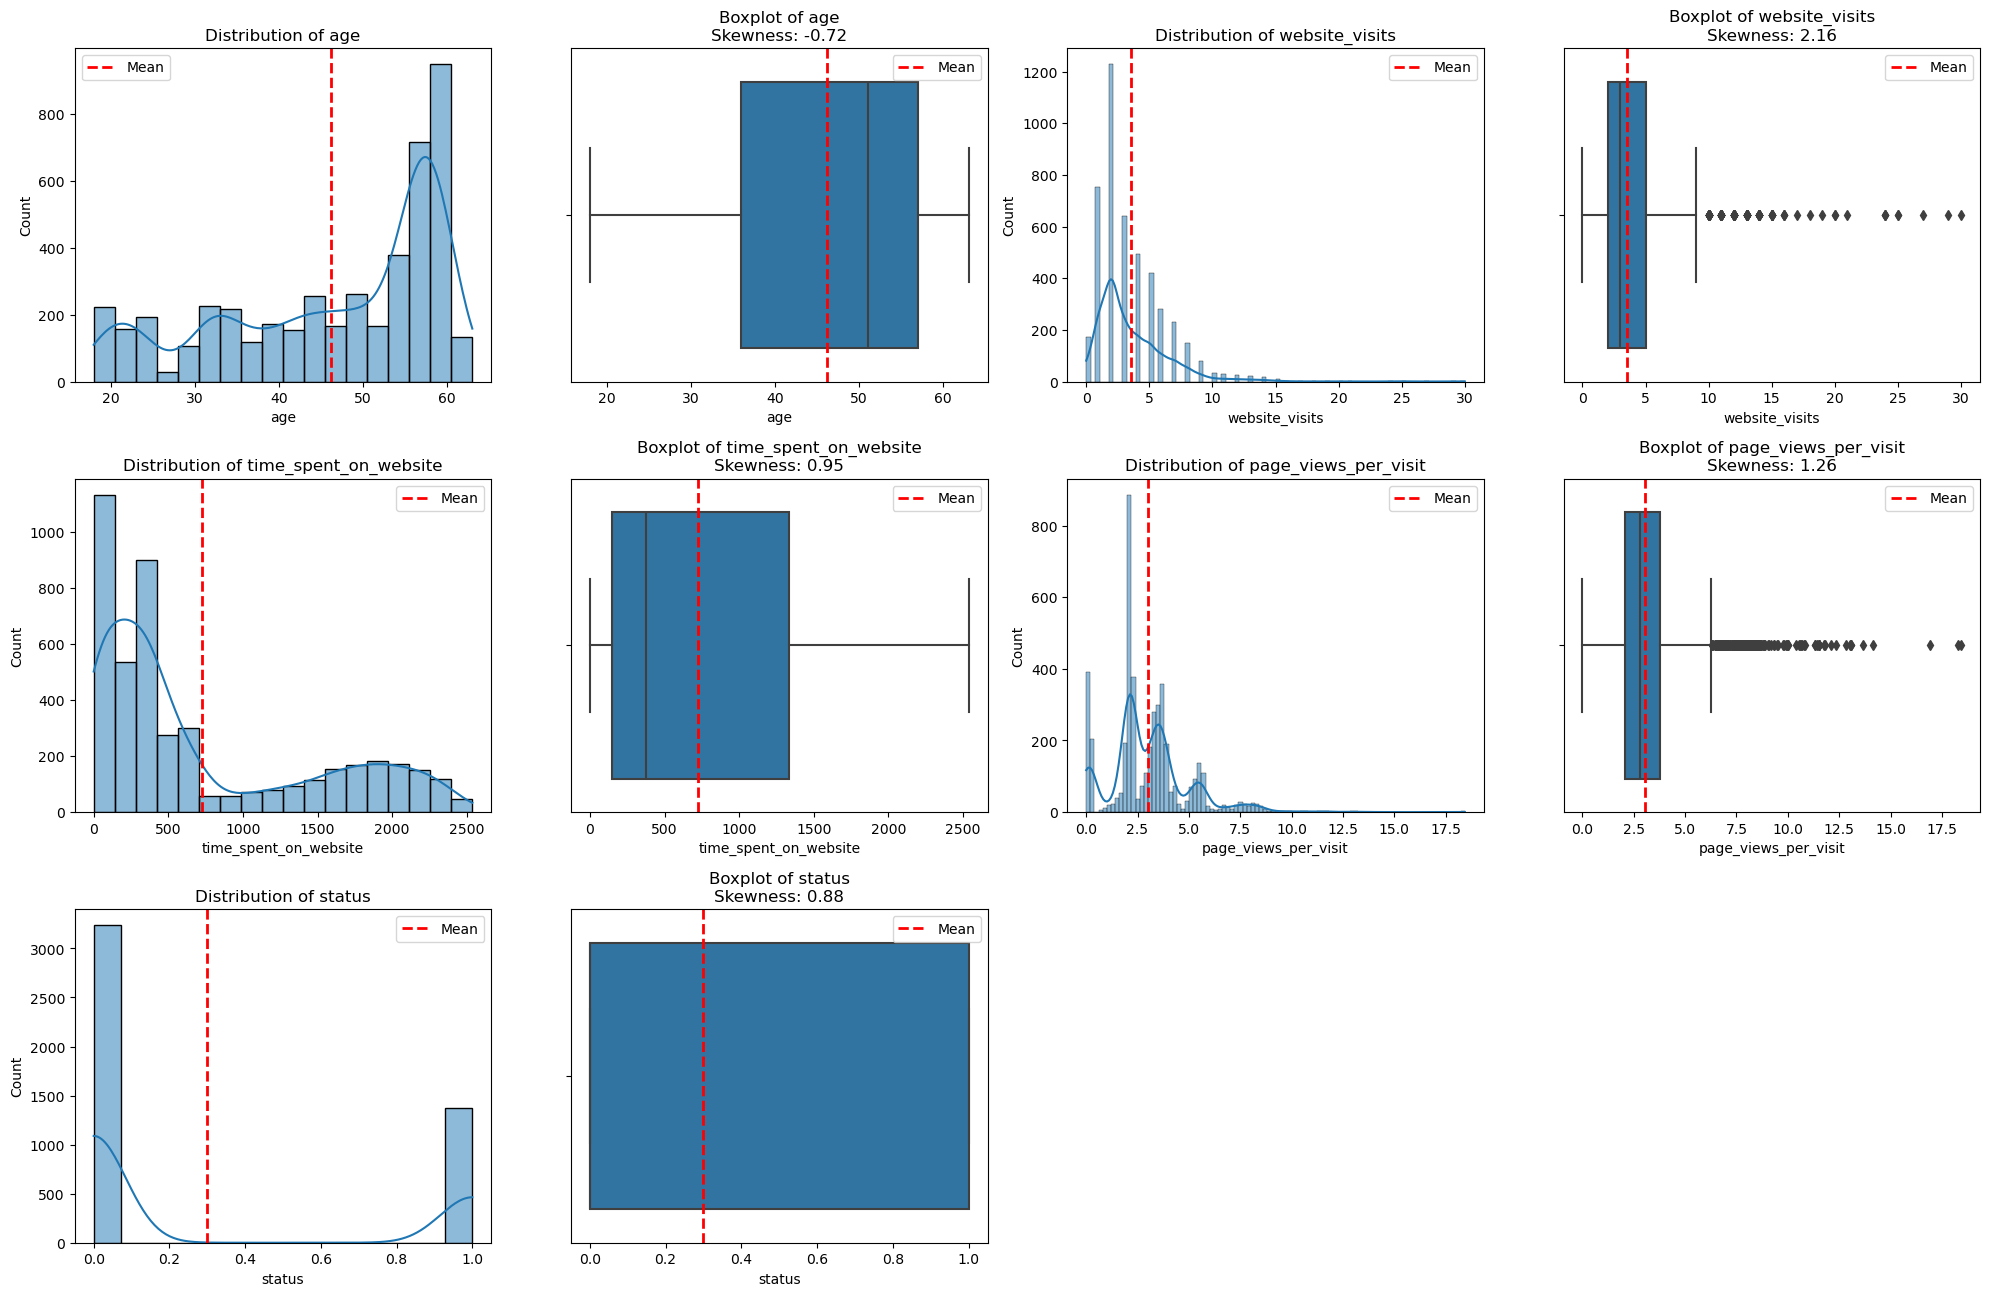

In [33]:
def plot_histogram_and_boxplot(df, cols):
    """
    Draw a histogram and a boxplot for each of the selected numerical variables in the given DataFrame.

    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        Original DataFrame.
    cols : list
        A list of numerical variables (columns).

    Returns
    -------
    None.

    """
    
    # Set the figure size.
    plt.figure(figsize=(20, 60))
    # Iterate each column from the original dataset.
    for i, col in enumerate(cols, 1):
        
        # -------- Histogram subplot --------
        # Set the first subplot position (an odd position).
        plt.subplot(len(df.columns), 4, 2 * i - 1)
        # Draw the histogram.
        sns.histplot(df[col], kde=True)
        # Draw a red dash line of the average value.
        plt.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
        # Set the title.
        plt.title(f'Distribution of {col}')
        # Set the legend.
        plt.legend()
    
        # -------- Boxplot subplot --------
        # Set the second subplot position (an even position).
        plt.subplot(len(df.columns), 4, 2 * i)
        # Draw the boxplot.
        sns.boxplot(x=df[col])
        # Draw a red dash line of the average value.
        plt.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
        # Compute skewness.
        sk_value = skew(df[col].dropna())
        # Set the title and add skewness as text annotation.
        plt.title(f'Boxplot of {col}\nSkewness: {sk_value:.2f}')
        # Set the legend.
        plt.legend()
    
    # Adjust spacing to prevent overlap between subplots.
    plt.tight_layout()
    # Show all plots.
    plt.show()

# Plot numerical variables.
plot_histogram_and_boxplot(data, num_cols)

📊 **Observations on Numerical Variables**

- **Age**
  - Ranges from **18 to 63 years** with an average of ~46 years.  
  - The middle 50% of users are between **36 and 57 years**, indicating a concentration in middle-aged groups.  
  - Standard deviation ≈ 13 suggests a fairly wide spread.  
  - No extreme outliers apparent from the range.

- **Website Visits**
  - Users visit on average ~3.6 times, with a median of 3.  
  - Most users fall between **2 and 5 visits**, but the maximum of 30 indicates the presence of heavy users.  
  - Likely **right-skewed** distribution due to high maximum.

- **Time Spent on Website**
  - Average time ≈ 724 minutes, but median = 376, showing that many users spend much less than the average.  
  - 75% of users spend ≤ 1337 minutes, while the max is 2537 → suggests a small group of **very engaged users**.  
  - Strong evidence of **right skewness**.

- **Page Views per Visit**
  - Average ≈ 3.0, median ≈ 2.8, with most users between ~2.1 and 3.8.  
  - Maximum = 18.4 suggests some outliers with unusually high engagement.  
  - Likely mildly **right-skewed**.

- **Status (Target Variable)**
  - Mean = 0.299 → around **30% of users converted**.  
  - Confirms the dataset is **imbalanced** (~70% non-converted vs. 30% converted).  

---

🔎 **Overall Insights**
- Engagement metrics (`website_visits`, `time_spent_on_website`, `page_views_per_visit`) show **skewness with outliers**, driven by a minority of highly active users.  
- Age distribution appears broad but centered around middle age.  
- Target variable (`status`) is imbalanced, which may need resampling or class-weight adjustments in modeling.  

#### **2. Categorical Variables**

In [36]:
# Check the summary Statistics for categorical variables.
data[cat_cols].describe().T

,count,unique,top,freq
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


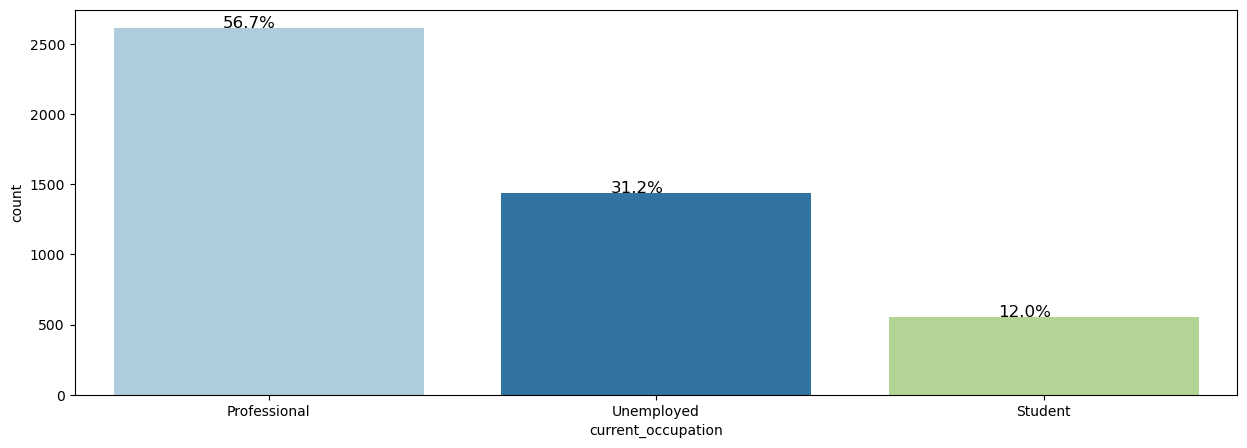

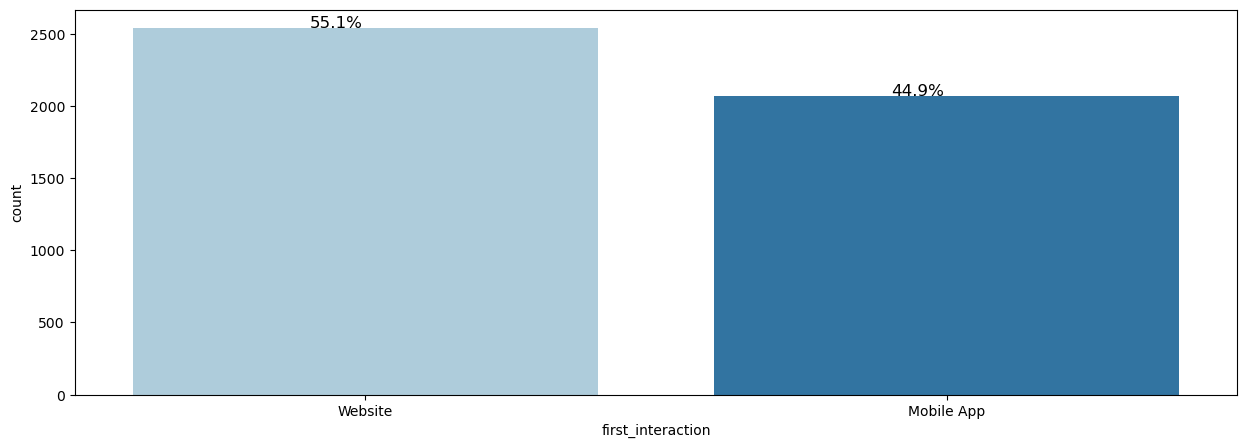

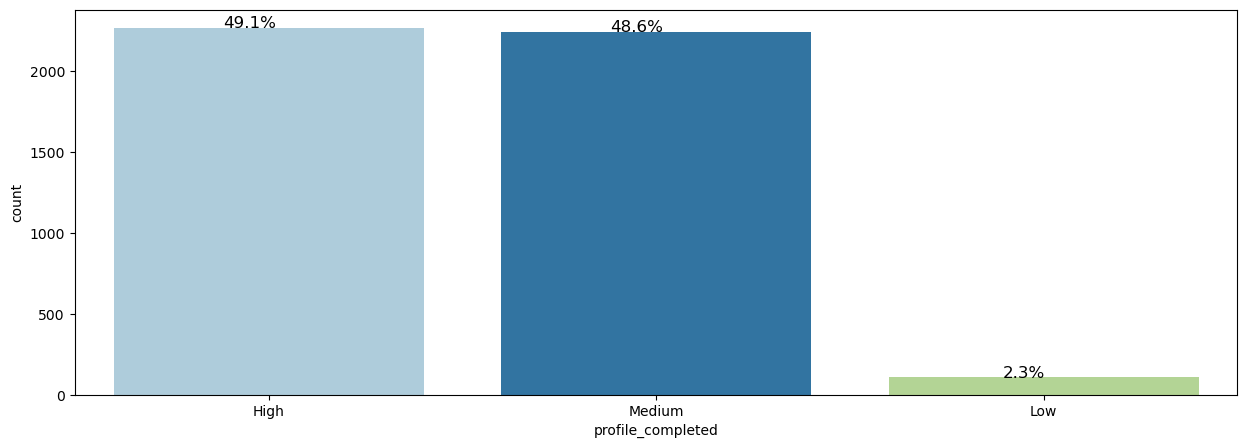

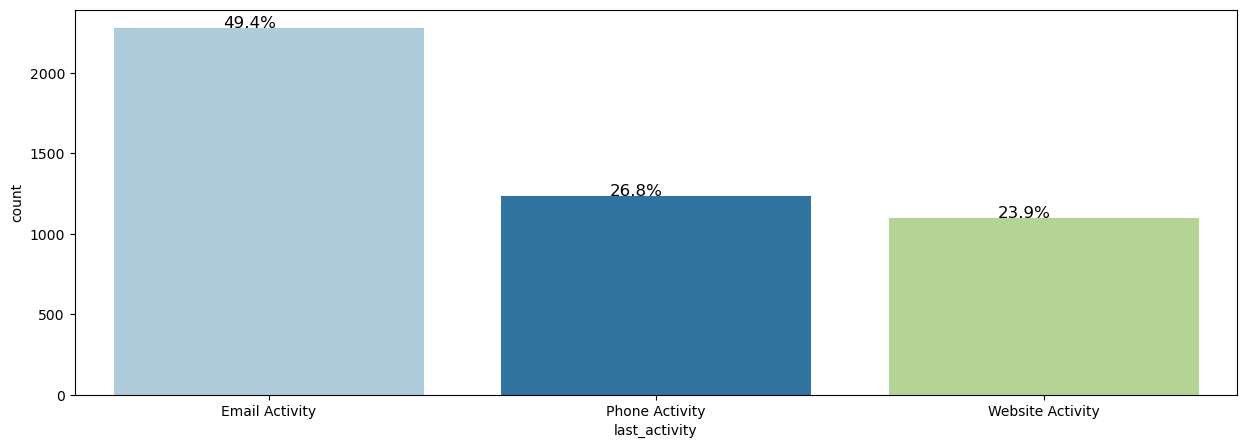

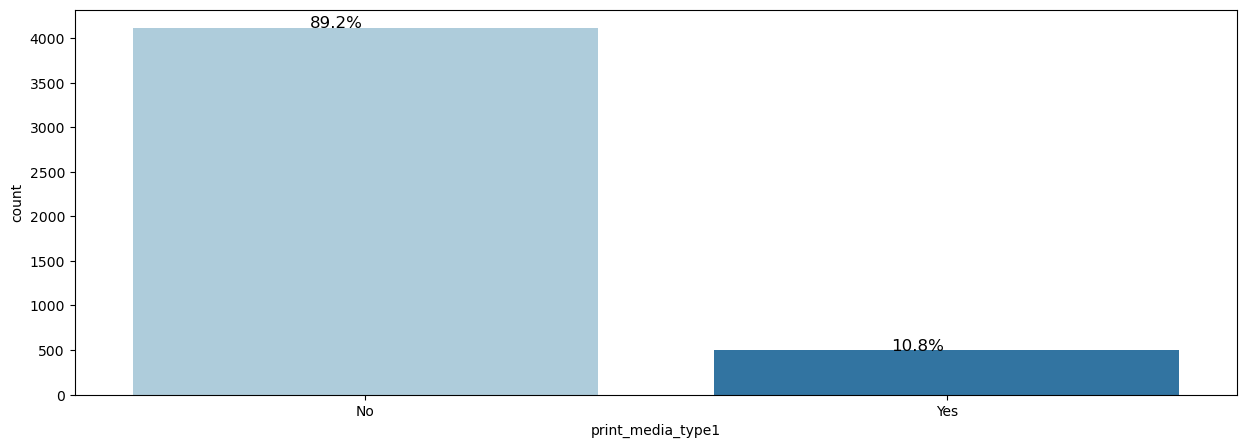

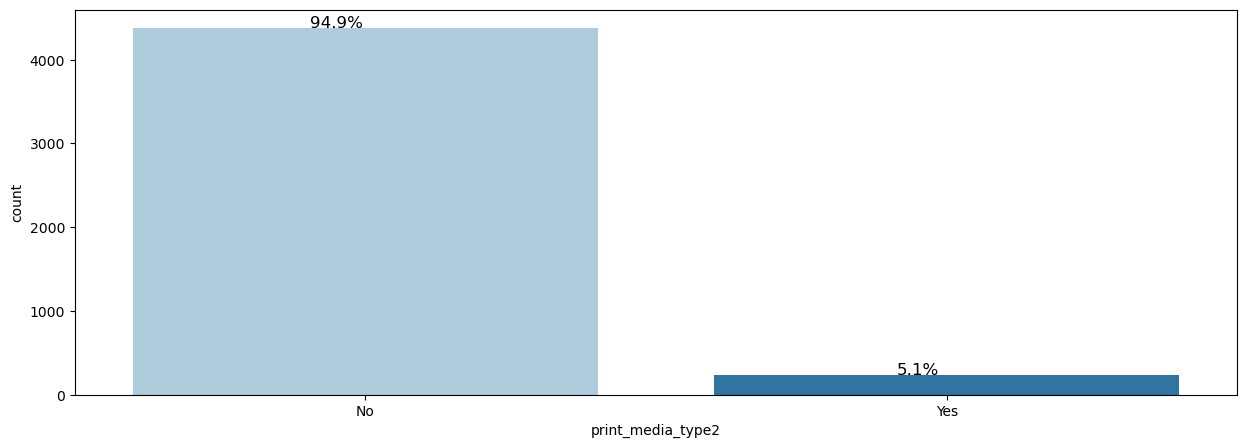

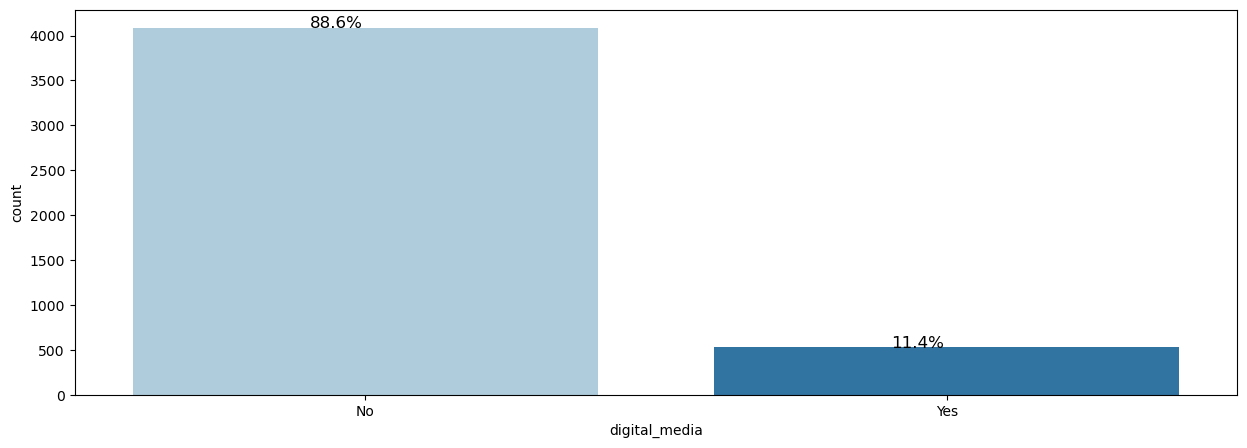

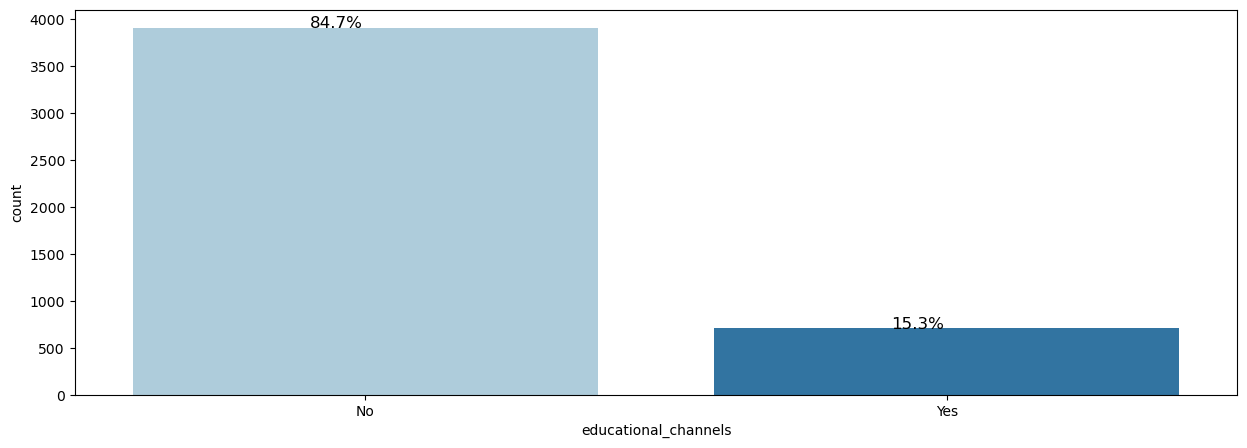

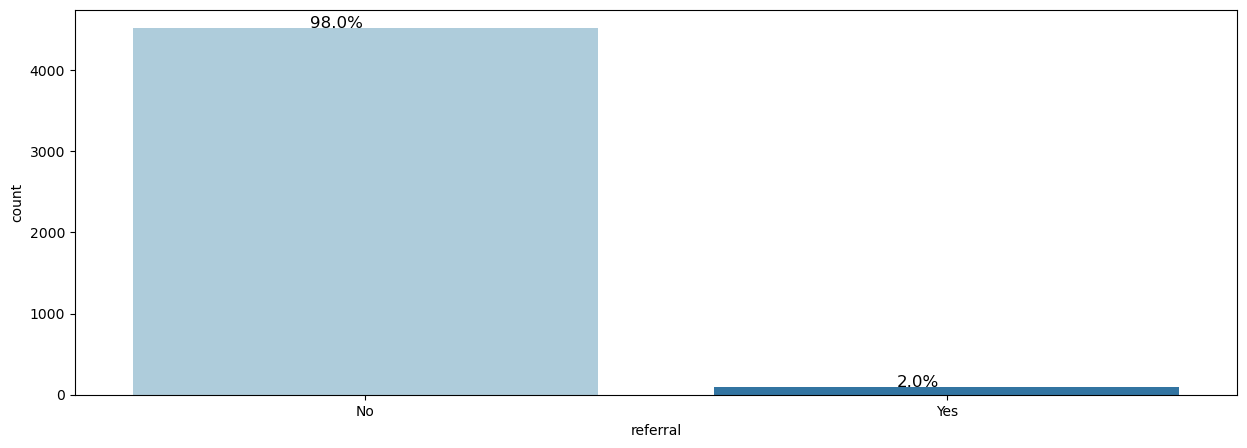

In [37]:
def plot_category_percentage(df, cols):
    """
    Create a bar plot for each selected categorical variable in the given DataFrame. The label on each bar should display the percentage of each unique category relative to the total number of entries.

    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        Original DataFrame.
    cols : list
        A list of categorical variables (columns).

    Returns
    -------
    None.

    """
    
    # Iterate each column from the original dataset.
    for i, col in enumerate(cols, 1):
        # Count the number of entires under this column.
        total = len(data[col])
        # Set the figure size.
        plt.figure(figsize=(15, 5))
        # Draw a countplot.
        ax = sns.countplot(data=data, x=col, palette='Paired', order=data[col].value_counts().index)
        # Iterate each bar from the plot.
        for patch in ax.patches:
            # Calculate the percentage of this bar to the total entries.
            percentage = '{:.1f}%'.format(100 * patch.get_height() / total)
            # Get the horizontal position of the label.
            x = patch.get_x() + patch.get_width() / 2 - 0.05
            # Get the vertical position of the label.
            y = patch.get_y() + patch.get_height()
            # Annotate the percentage.
            ax.annotate(percentage, (x, y), size=12, ha='center')
    # Show the plot
    plt.show()

# Plot numerical variables.
plot_category_percentage(data, cat_cols)

🔬 **Observations**

- **Current Occupation**  
   - Majority are **Professionals (56.7%)**, followed by **Unemployed (31.2%)**, and **Students (12%)**.  
   - Dataset is skewed towards working professionals.  

- **First Interaction Channel**  
   - Split between **Website (55.1%)** and **Mobile App (44.9%)**.  
   - Website is slightly more dominant.  

- **Profile Completion Level**  
   - Nearly half are **High (49.1%)** and **Medium (48.6%)**, while only **2.3%** are **Low**.  
   - Suggests most users engage enough to fill out their profiles.  

-  **Last Activity**  
   - Engagement happens mostly via **Email (49.4%)**, followed by **Phone (26.8%)** and **Website (23.9%)**.  
   - Email is the main communication channel.  

-  **Print Media Type 1 & Type 2**  
   - Low impact: **Type 1 (10.8%)**, **Type 2 (5.1%)**.  
   - Indicates minimal reliance on print marketing.  

- **Digital Media**  
   - Only **11.4%** of users are reached through digital media.  
   - Represents a small but digitally active segment.  

- **Educational Channels**  
   - **15.3%** exposure through educational channels.  
   - A niche but potentially valuable group.  

-  **Referral**  
   - Very few users come from referrals (**2%**).  
   - Suggests weak word-of-mouth promotion.  

---

🔎 **Overall Insight**

The dataset reflects a **professional, digitally-engaged audience**, with strong interaction through **websites and email**, while print media and referrals contribute very little.

### **ii. Bivariate Analysis**

#### **1. Correlation Heat Map**

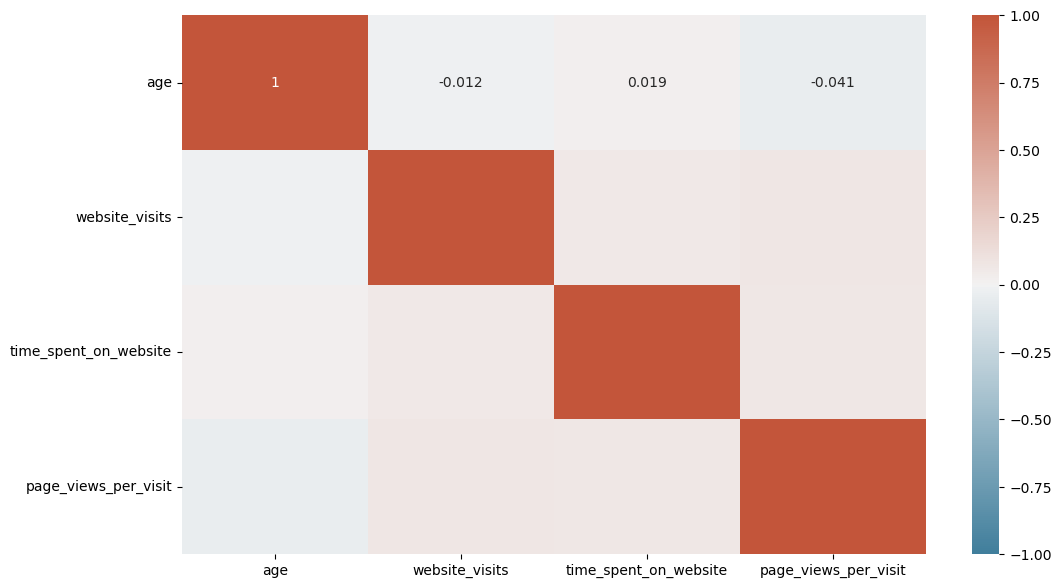

In [41]:
# Set figure size.
plt.figure(figsize=(12, 7))
# Set color map.
cmap = sns.diverging_palette(230, 20, as_cmap = True)
# Draw a heatmap of the columns correlation to each other.
sns.heatmap(data.drop(['status'],axis = 1).corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, cmap = cmap)
# Display the plots.
plt.show()

🔬 **Observations**

- **Age** shows almost no correlation with other variables (close to 0 values).  
  - Slight negative correlation with `page_views_per_visit` (-0.04).  
  - Very weak positive correlation with `time_spent_on_website` (0.0189).  

- **Website_visits** has weak positive correlations:  
  - With `time_spent_on_website` (0.0623).  
  - With `page_views_per_visit` (0.0741).  

- **Time_spent_on_website** shows a weak positive correlation with `page_views_per_visit` (0.0681).  

- Overall, **all correlation values are close to 0**, indicating that the numerical variables are largely **independent** of each other and do not exhibit strong linear relationships.  

#### **2. Numerical Variable Distribution**

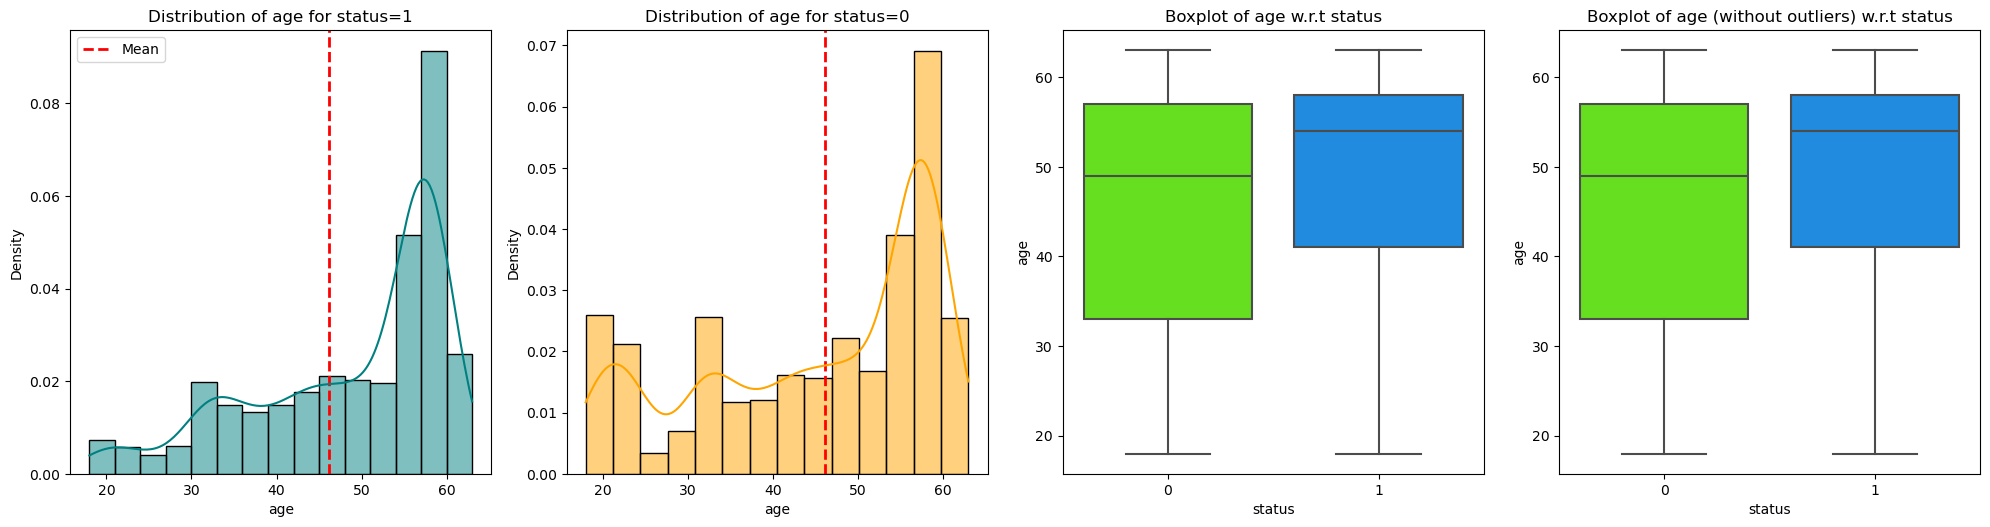

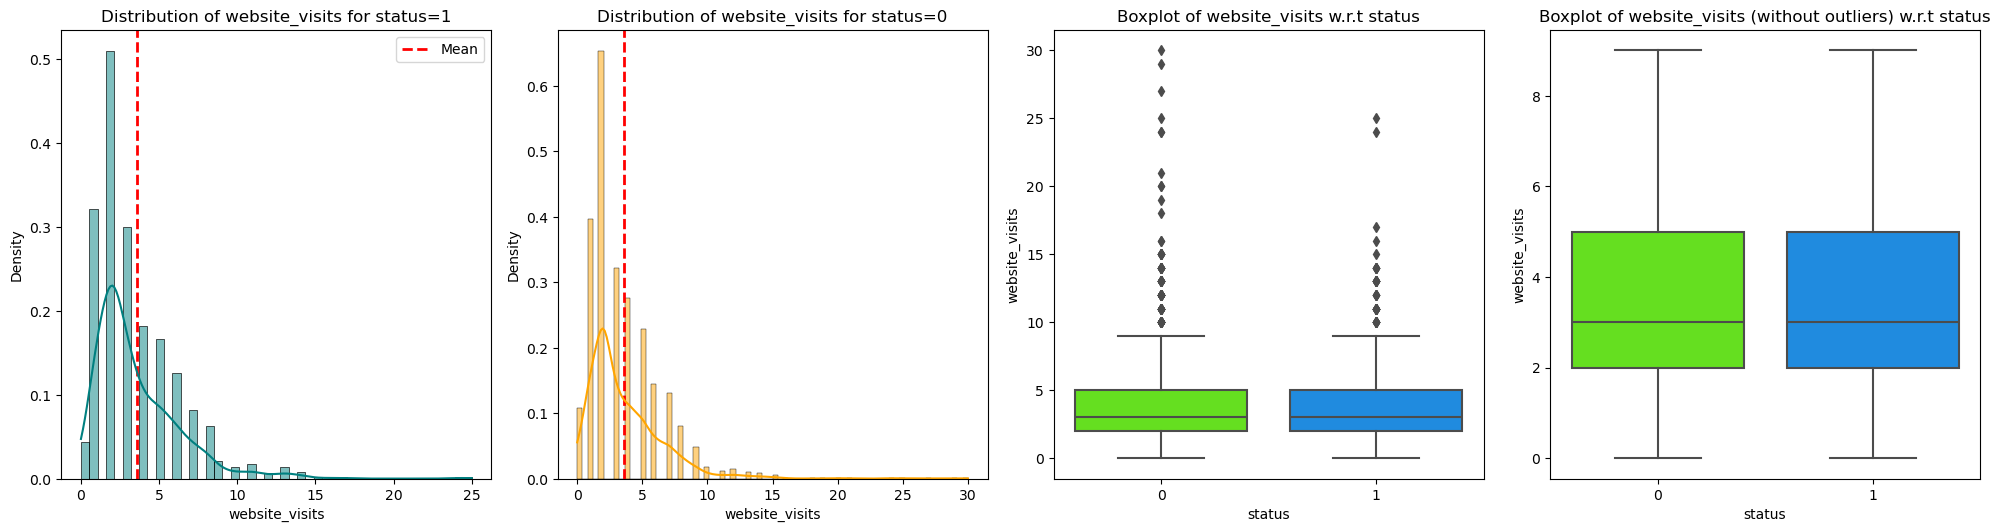

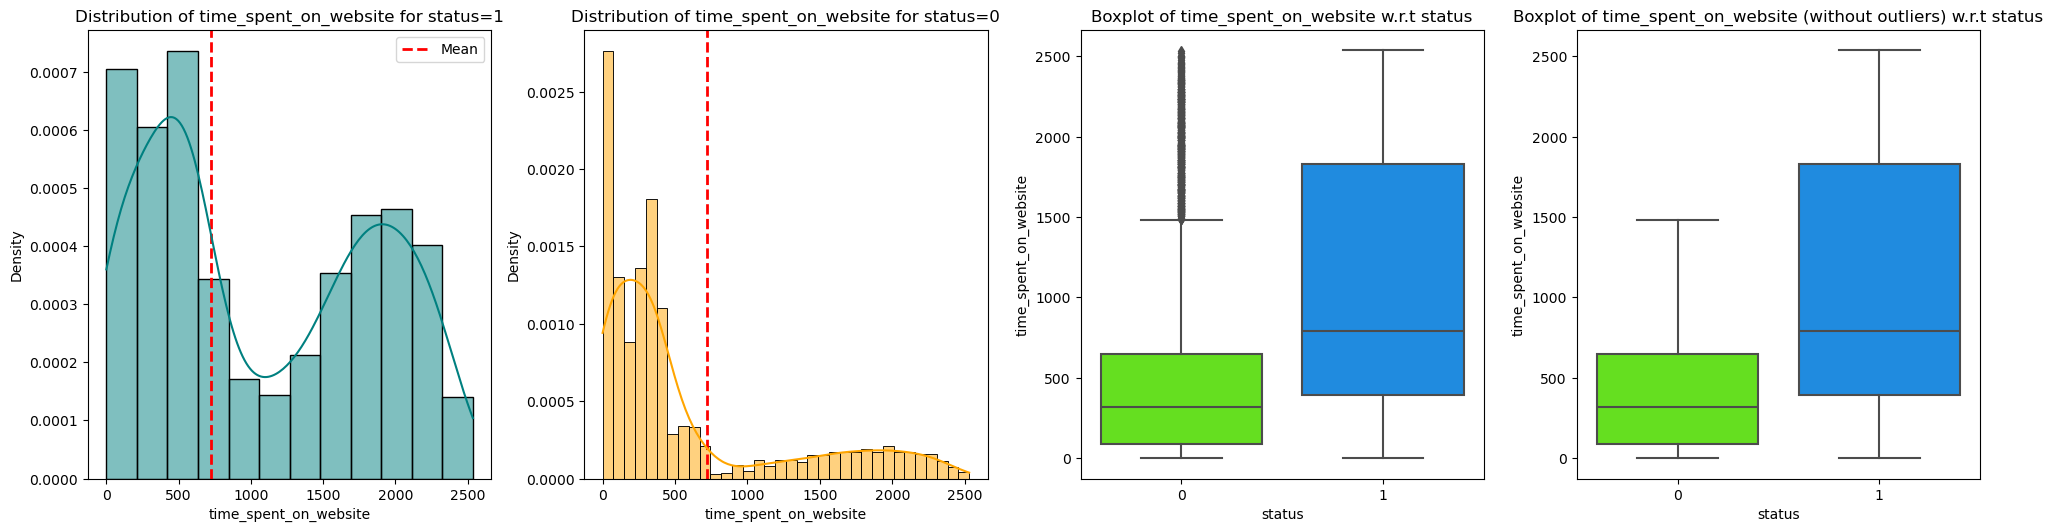

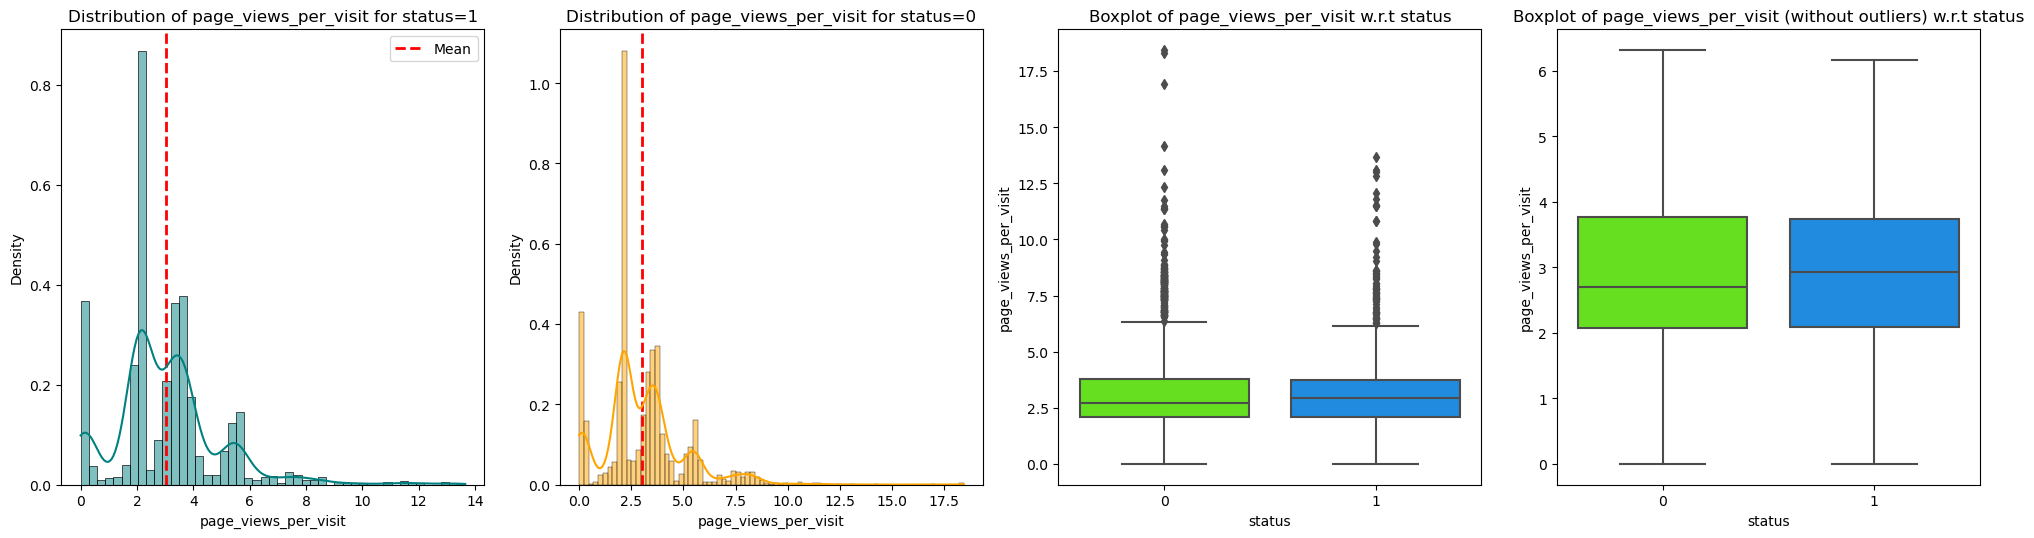

In [44]:
def plot_distribution_with_target(df, cols, target):
    """
    Plot numerical variable distributions with regard to each target variable value. Each variable gets four figures - 1) distribution of target variable value 1, 2) distribution of target variable value 2, 3) boxplot w.r.t target variable, 4) boxplot w.r.t target variable without outliers.
    
    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        The original DataFrame.
    cols : pandas.core.indexes.base.Index
        A list of numerical variables (columns).
    target : str
        Target variable.

    Returns
    -------
    None.

    """

    # Get the number of rows. Each row displays four figures of a variable.
    num_rows = len(cols)
    
    # Iterate each column from the given dataset.
    for i, col in enumerate(cols, 1):
        
        # Set the figure size.
        plt.figure(figsize=(20, 20))
        
        # --------  Distribution for target variable value 1 --------
        # Set the first subplot position.
        plt.subplot(num_rows, 4, 4 * i - 3)
        # Extract unique values of the target variable.
        target_uniq = data[target].unique()
        # Draw a red dash line of the average value.
        plt.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
        # Set the title.
        plt.title(f"Distribution of {col} for {target}={str(target_uniq[0])}")
        # Draw the histogram.
        sns.histplot(data=df[df[target] == target_uniq[0]], x=col, kde=True, color="teal", stat="density")
        # Set the legend.
        plt.legend()
        
        # --------  Distribution for target variable value 2 --------
        # Set the second subplot position.
        plt.subplot(num_rows, 4, 4 * i - 2)
        # Draw a red dash line of the average value.
        plt.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
        # Set the title.
        plt.title(f"Distribution of {col} for {target}={str(target_uniq[1])}")
        # Plot histogram.
        sns.histplot(data=df[df[target] == target_uniq[1]], x=col, kde=True, color="orange", stat="density")
        
        # --------  Boxplot w.r.t target variable --------
        # Set the third subplot position.
        plt.subplot(num_rows, 4, 4 * i - 1)
        # Set the title.
        plt.title(f"Boxplot of {col} w.r.t {target}")
        # Draw boxplot to compare predictor values across target categories.
        sns.boxplot(data=df, x=target, y=col, palette="gist_rainbow")

        # --------  Boxplot w.r.t target variable without outliers--------
        # Set the forth subplot position.
        plt.subplot(num_rows, 4, 4 * i)
        # Set the title.
        plt.title(f"Boxplot of {col} (without outliers) w.r.t {target}")
        # Draw boxplot to compare predictor values across target categories.
        sns.boxplot(data=df, x=target, y=col, showfliers=False, palette="gist_rainbow")

        # Adjust spacing between subplots for readability.
        plt.tight_layout()
        # Show the plot.
        plt.show()

# Remove target variable "status" from numerical columns.
num_cols = num_cols.delete(-1)
# Plot numerical variables.
plot_distribution_with_target(data, num_cols, 'status')

🔬 **Observations**

- **Age**
    - **Mean age** is higher for status = 1 (48.66) than for status = 0 (45.15).  
    - **Median age** also reflects this difference (54 vs. 49).  
    - Age distribution is slightly **older** in the status = 1 group.  
    - Both groups have the same minimum (18) and maximum (63).

- **Website Visits**
    - **Mean visits** are nearly the same for both groups (3.58 vs. 3.54).  
    - **Median visits** are also identical (3 for both groups).  
    - Both groups share the same interquartile range (2–5 visits).  
    - Maximum visits are slightly higher for status = 0 (30 vs. 25).  

- **Time Spent on Website**
    - **Mean time** is much higher for status = 1 (1068s) compared to status = 0 (577s).  
    - **Median time** also shows a large gap (789s vs. 317s).  
    - Interquartile range:  
        - Status = 0: [88, 646]  
        - Status = 1: [390, 1829]  
    - Both groups have similar maximums (~2530s).  

- **Page Views per Visit**
    - **Mean and median values** are almost identical across groups (~3).  
    - Interquartile ranges are very similar.  
    - Status = 0 group has a higher **maximum** (18.43 vs. 13.66).  

---

🔍 **Insights**

- Status = 1 individuals tend to be older.
- Website visits do **not differ meaningfully** by status.
- Status = 1 individuals spend **considerably more time** on the website.
- Page views per visit are **consistent across groups**, with no major differences.

---

⚠️ **Overall Key Takeaways**

- **Age** and **time spent on the website** show clear differences between status groups.  
- **Website visits** and **page views per visit** remain fairly consistent regardless of status.  
- Time engagement (duration) appears to be a stronger differentiator than frequency of visits.

#### **3. Categorical Variable Stacked Barplot**

------------------------------------------------------------------------------------------------------------------------
status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555


<Figure size 8000x6000 with 0 Axes>

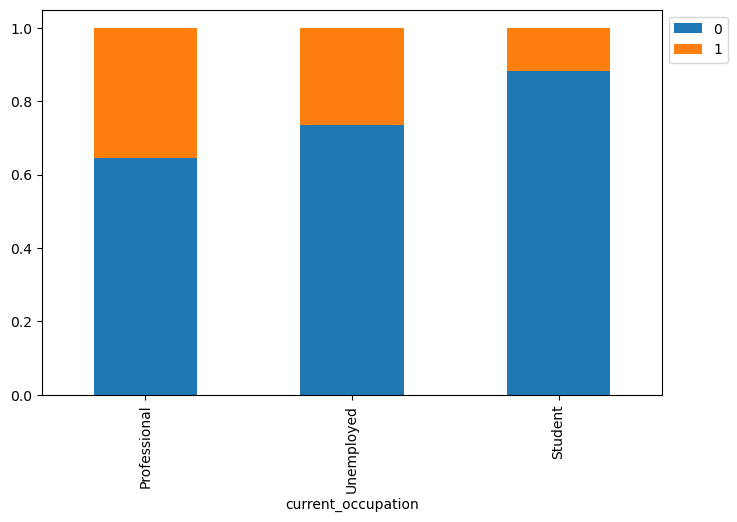

------------------------------------------------------------------------------------------------------------------------
status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070


<Figure size 8000x6000 with 0 Axes>

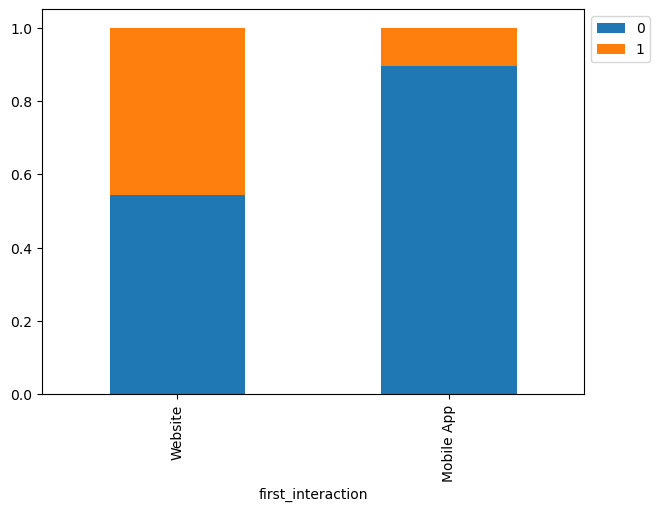

------------------------------------------------------------------------------------------------------------------------
status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107


<Figure size 8000x6000 with 0 Axes>

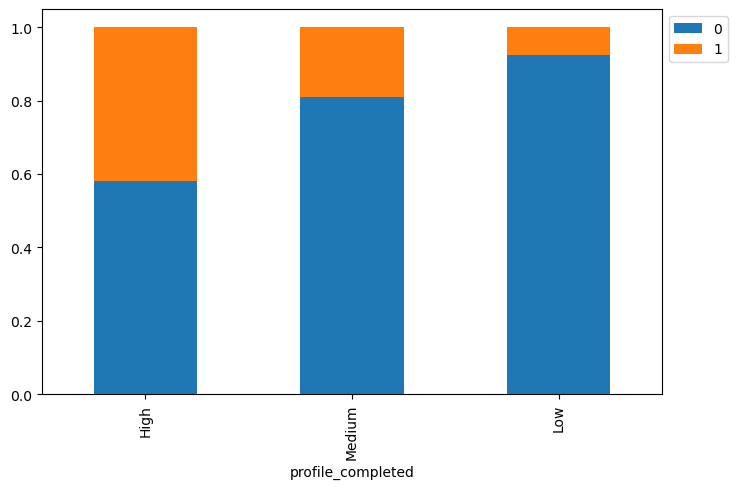

------------------------------------------------------------------------------------------------------------------------
status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234


<Figure size 8000x6000 with 0 Axes>

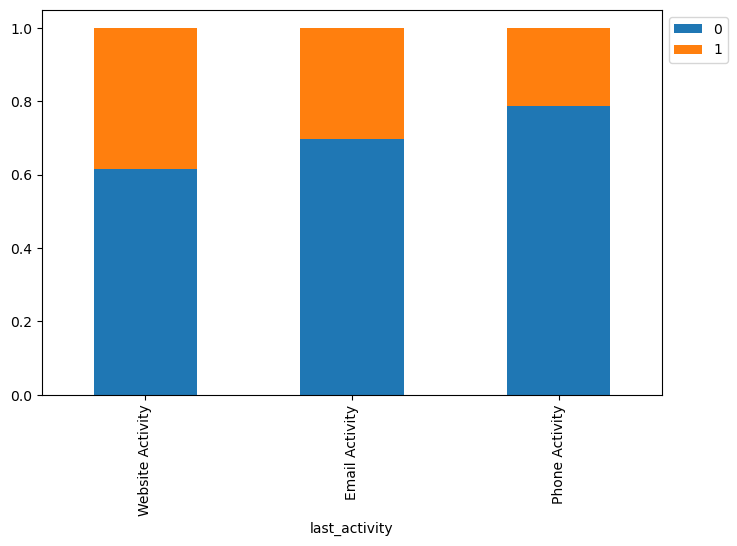

------------------------------------------------------------------------------------------------------------------------
status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497


<Figure size 8000x6000 with 0 Axes>

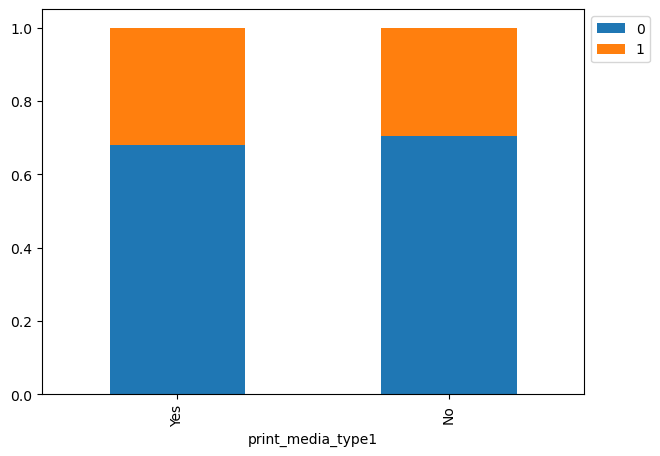

------------------------------------------------------------------------------------------------------------------------
status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233


<Figure size 8000x6000 with 0 Axes>

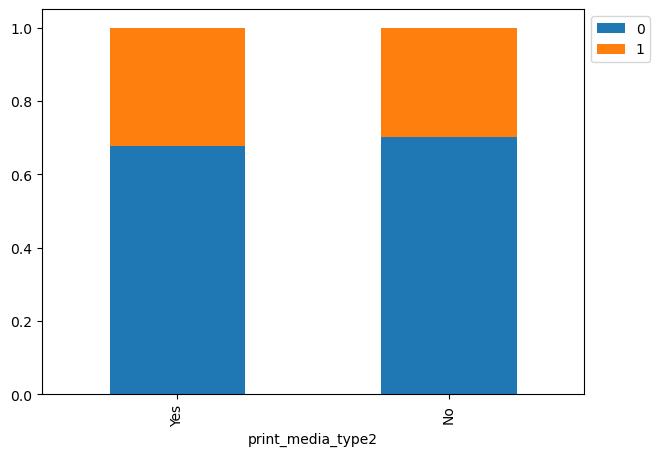

------------------------------------------------------------------------------------------------------------------------
status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527


<Figure size 8000x6000 with 0 Axes>

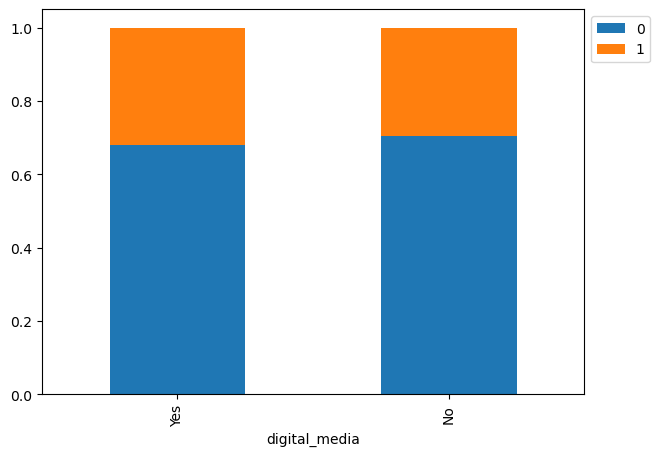

------------------------------------------------------------------------------------------------------------------------
status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705


<Figure size 8000x6000 with 0 Axes>

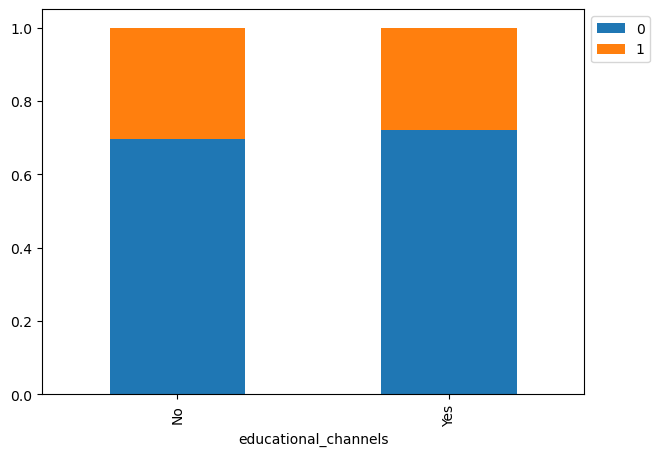

------------------------------------------------------------------------------------------------------------------------
status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93


<Figure size 8000x6000 with 0 Axes>

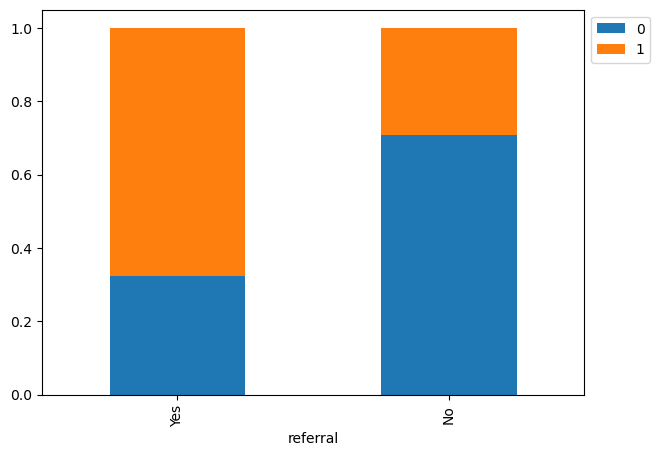

In [47]:
def draw_stacked_barplot(df, cols, target):
    """
    Plot stacked plots for each categorial variable's conversion with regard to each target variable value.

    Parameters
    ----------
    df : pandas.core.frame.DataFrame
        The original DataFrame.
    cols : pandas.core.indexes.base.Index
        A list of numerical variables (columns).
    target : str
        Target variable.

    Returns
    -------
    None.

    """
    # Get the number of rows. Each row represents a variable.
    num_rows = len(cols)
    # Iterate each column from the given dataset.
    for i, col in enumerate(cols, 1):
        # Set the figure size.
        plt.figure(figsize=(80, 60))
        # Count unique values under this column.
        count = df[col].nunique()
        # Print divider line.
        print("-" * 120)
        # Get the last unique value as the sorter value.
        sorter = df[target].value_counts().index[-1]
        # Create a cross table of each value's count of the given variable.
        table = pd.crosstab(df[col], df[target], margins=True).sort_values(by=sorter, ascending=False)
        # Print the cross table.
        print(table)
        # Create a normalized cross table using the same data for plotting.
        norm_table = pd.crosstab(df[col], df[target], normalize="index").sort_values(by=sorter, ascending=False)
        # Plot the stacked bar plot of the normalized cross table.
        norm_table.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
        # Set the legend.
        plt.legend(loc="lower left", frameon=False)
        # Set the legend.
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
        # Show the plot.
        plt.show()

# Plot numerical variables.
draw_stacked_barplot(data, cat_cols, 'status')

🔬 **Observations**

- **Current Occupation**
   - Professionals and unemployed individuals make up the majority of the dataset.  
   - Conversion rates are highest among professionals (35.5%) and lowest among students (11.7%).  
   - Students have a very high non-conversion rate (88.3%), suggesting low engagement or readiness.

- **First Interaction**
   - Website and Mobile App are the two main sources of first interaction.  
   - Website users have a much higher conversion rate (45.6%) compared to Mobile App users (10.5%).  
   - Mobile App appears to attract a large audience but yields fewer conversions.

- **Profile Completion**
   - A clear positive relationship exists between profile completion level and conversion.  
   - High profile completion leads to a conversion rate of 41.8%, while medium completion drops sharply to 18.9%.  
   - Low completion has the weakest conversion (7.5%).  
   - This suggests that encouraging users to complete their profiles could significantly improve conversions.

- **Last Activity**
   - Website Activity shows the strongest conversion rate (38.5%), followed by Email Activity (30.3%), and Phone Activity (21.3%).  
   - Users with Phone Activity are least likely to convert.  
   - Engagement through digital touchpoints (website, email) is more effective than phone calls.

- **Print Media (Type 1 & 2)**
   - Both print media types show low overall influence, with only a slight improvement in conversion for those exposed to them (~32%).  
   - Effect appears marginal compared to digital and referral channels.

- **Digital Media**
   - Exposure to digital media corresponds with a slightly higher conversion rate (31.9%) than those without it (29.6%).  
   - This suggests that digital campaigns provide a modest lift in conversions.

- **Educational Channels**
   - Users engaged via educational channels have a slightly lower conversion rate (27.9%) than those not engaged (30.2%).  
   - This may suggest that educational campaigns are not directly driving conversions.

- **Referral**
   - Referrals have the strongest impact: 67.7% of referred users converted, compared to only 29.1% among non-referred users.  
   - This highlights referrals as a highly effective channel for driving conversions.

---

⚠️ **Key Takeaway**

- **Referrals and website interactions** are the most effective drivers of conversion.  
- **Profile completion** is strongly correlated with conversion likelihood.  
- **Students, Mobile App users, and low-profile-completion users** show the weakest conversion outcomes, highlighting areas where targeted interventions may be needed.

## **IV. Modelling**

### **i. Preparation**

#### **1. Data Preprocessing**

In [52]:
# Drop target variable.
X = data.drop(["status"], axis=1)
# Set target variable.
Y = data["status"]
# Encode the categorical variables.
X = pd.get_dummies(X, drop_first = True)
# Split the data in 70:30 ratio for train to test data.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

✏️ **Processed Dataset Summary**

In [54]:
print("------------- Shape of Datasets -------------")
print(f"Shape of Training set: {X_train.shape}")
print(f"Shape of test set :{X_test.shape}")
print()
print("--- Percentage of classes in training set ---")
print(y_train.value_counts(normalize=True))
print()
print("----- Percentage of classes in test set -----")
print(y_test.value_counts(normalize=True))

------------- Shape of Datasets -------------
Shape of Training set: (3228, 16)
Shape of test set :(1384, 16)

--- Percentage of classes in training set ---
status
0   0.70415
1   0.29585
Name: proportion, dtype: float64

----- Percentage of classes in test set -----
status
0   0.69509
1   0.30491
Name: proportion, dtype: float64


#### **2. Metrics Score Function Preparation**

In [56]:
def get_metrics_score(actual, predicted):
    """
    Evaluate the model performance by comparing confusion matrix of actual and predicted value.

    Parameters
    ----------
    actual : pandas.core.series.Series
        The actual data of target variable from the training set.
    predicted : numpy.ndarray
        The predicted data generated by the selected model using training data.

    Returns
    -------
    None.

    """

    # Print classification report for the datasets.
    print(classification_report(actual, predicted))
    # Build confusion matrix.
    cm = confusion_matrix(actual, predicted)
    # Set figure size.
    plt.figure(figsize = (8, 5))
    # Draw a heatmap of the  confusion matrix.
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    # Set axis label.
    plt.ylabel('Actual')
    # Set axis label.
    plt.xlabel('Predicted')
    # Show the plot.
    plt.show()

### **ii. Decision Tree**

#### **1. Modelling**

In [59]:
# Create a Decision Tree Classifier model.
d_tree =  DecisionTreeClassifier(random_state = 7)
# Fit the classifier on the training data.
d_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



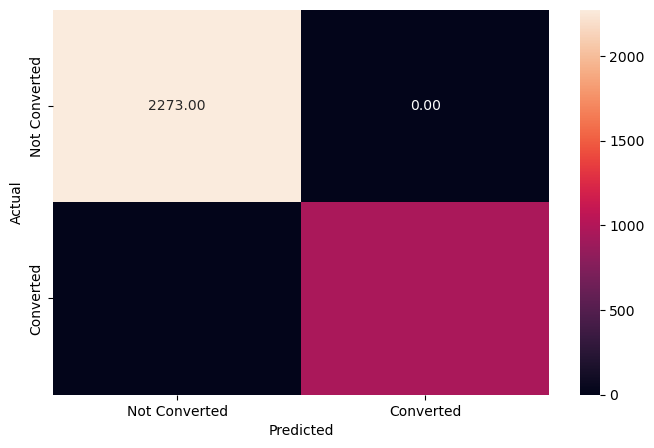

In [60]:
# Predict based on training data.
y_pred_train1 = d_tree.predict(X_train)
# Evaluate the model.
get_metrics_score(y_train, y_pred_train1)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



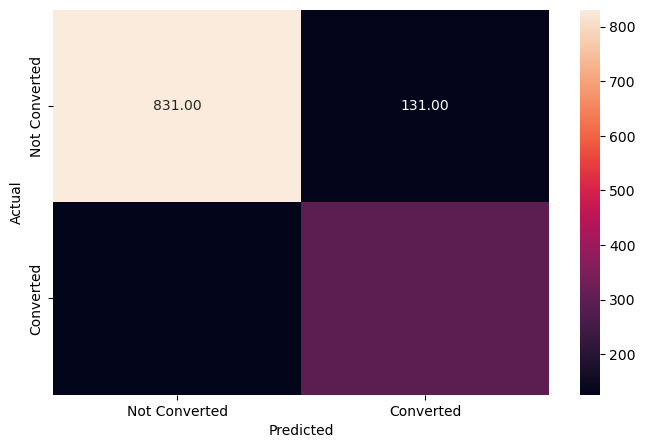

In [61]:
# Predict based on test data.
y_pred_test1 = d_tree.predict(X_test)
# Evaluate the model.
get_metrics_score(y_test, y_pred_test1)

🔬 **Observations**

- **Training Data**
    - Achieved **perfect precision, recall, and F1-score (1.00)** across both classes.  
    - While this seems ideal, such results are unrealistic in practice and strongly suggest **overfitting**.  

- **Test Data**
    - Overall **accuracy: 81%**, showing a noticeable drop compared to training.  
    - **Class 0 (majority class):**
        - F1-score = **0.87** → predicted well.  
    - **Class 1 (minority class):**
        - F1-score = **0.70** → weaker performance.  
        - Indicates the model struggles more with positive cases.  
    - The gap highlights **bias toward the majority class** and reduced generalization ability.  

---

⚠️ **Key Takeaway**  
- The large gap between training and test performance confirms **overfitting**.  
- Lower performance on class 1 suggests a need to address **class imbalance** (e.g., resampling, class weights) or adjust **model complexity**.  

#### **2. Hyperparameter Tuning**

In [64]:
# Choose the type of classifier.
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})
# Set parameters.
parameters = {'max_depth': np.arange(2, 10), 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [5, 10, 20, 25]}
# Set the type of scoring to compare parameter combinations.
scorer = metrics.make_scorer(recall_score, pos_label = 1)
# Initialize GridSearchCV with the tuned decision tree.
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring=scorer, cv=5)
# Fit the grid search object on the training data to find the best hyperparameters.
grid_obj = grid_obj.fit(X_train, y_train)
# Set the classifier to the best combination of parameters.
d_tree_tuned = grid_obj.best_estimator_
# Fit the best algorithm to the data.
d_tree_tuned.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,7
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,"{0: 0.3, 1: 0.7}"


              precision    recall  f1-score   support

           0       0.94      0.77      0.85      2273
           1       0.62      0.88      0.73       955

    accuracy                           0.80      3228
   macro avg       0.78      0.83      0.79      3228
weighted avg       0.84      0.80      0.81      3228



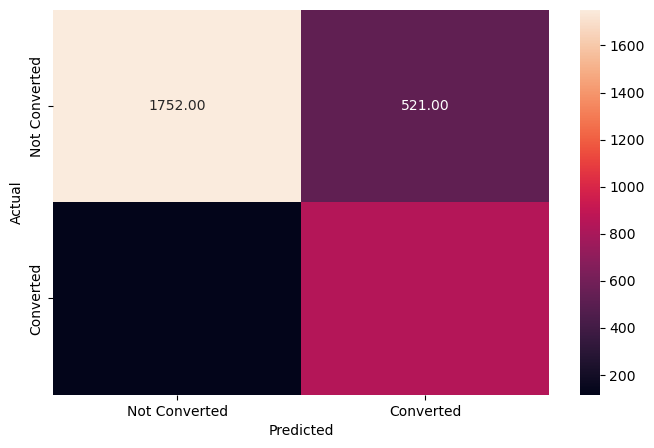

In [65]:
# Predict based on training data.
y_pred_train2 = d_tree_tuned.predict(X_train)
# Evaluate the model.
get_metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84       962
           1       0.62      0.86      0.72       422

    accuracy                           0.80      1384
   macro avg       0.77      0.82      0.78      1384
weighted avg       0.83      0.80      0.80      1384



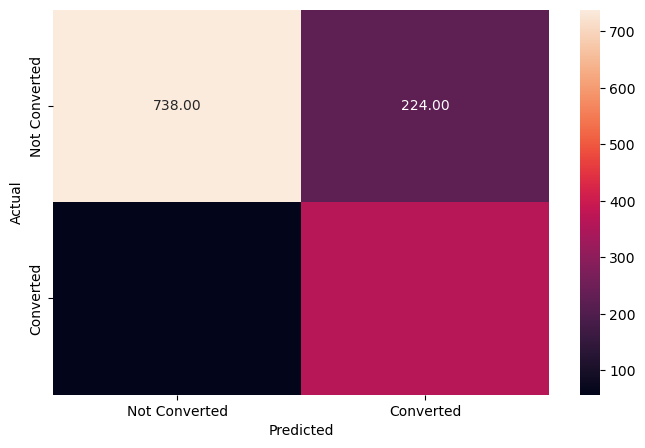

In [66]:
# Predict based on test data.
y_pred_test2 = d_tree_tuned.predict(X_test)
# Evaluate the model.
get_metrics_score(y_test, y_pred_test2)

🔬 **Observations**

- **Training Performance**
    - **Accuracy: 0.80** → The tuned Decision Tree does not overfit (unlike the Random Forest), showing similar train/test performance.  
    - **Class 0 (Majority Class)**  
        - Precision: 0.94 → Very reliable when predicting class 0.  
        - Recall: 0.77 → Misses ~23% of true class 0 instances.  
        - F1-score: 0.85 → Strong but not perfect balance.  
    - **Class 1 (Minority Class)**  
        - Precision: 0.62 → Moderate precision, more false positives.  
        - Recall: 0.88 → Very sensitive to detecting class 1 (better at catching positives than Random Forest).  
        - F1-score: 0.73 → Reasonably balanced, though lower precision drags it down.  

- **Test Performance**
    - **Accuracy: 0.80** → Matches training accuracy, confirming the model generalizes consistently.  
    - **Class 0**  
        - Precision: 0.93 → Predictions for class 0 are reliable.  
        - Recall: 0.77 → Misses a significant fraction of true class 0.  
        - F1-score: 0.84 → Similar to training performance.  
    - **Class 1**  
        - Precision: 0.62 → Still moderate; many predicted positives are wrong.  
        - Recall: 0.86 → Very strong sensitivity, correctly identifying most true class 1.  
        - F1-score: 0.72 → Matches training performance closely.  

- **Macro vs Weighted Averages**
    - **Macro Avg (F1 ≈ 0.78)** → Balanced view highlights that precision on minority class is limiting performance.  
    - **Weighted Avg (F1 ≈ 0.80)** → Close to accuracy, consistent across classes despite imbalance.  

---

⚠️ **Key Takeaway**  
- The **tuned Decision Tree** achieves **balanced train/test accuracy (80%)**, avoiding overfitting.  
- It prioritizes **recall for the minority class (class 1)** at the cost of precision, which means it catches most positives but with more false alarms.
- Future improvements could include:  
  - Ensemble methods (bagging/boosting) to refine precision.  
  - Adjusting decision thresholds for better balance between recall and precision.  
  - Feature engineering to reduce false positives.  

#### **3. Visualization**

##### **3.1. Tree**

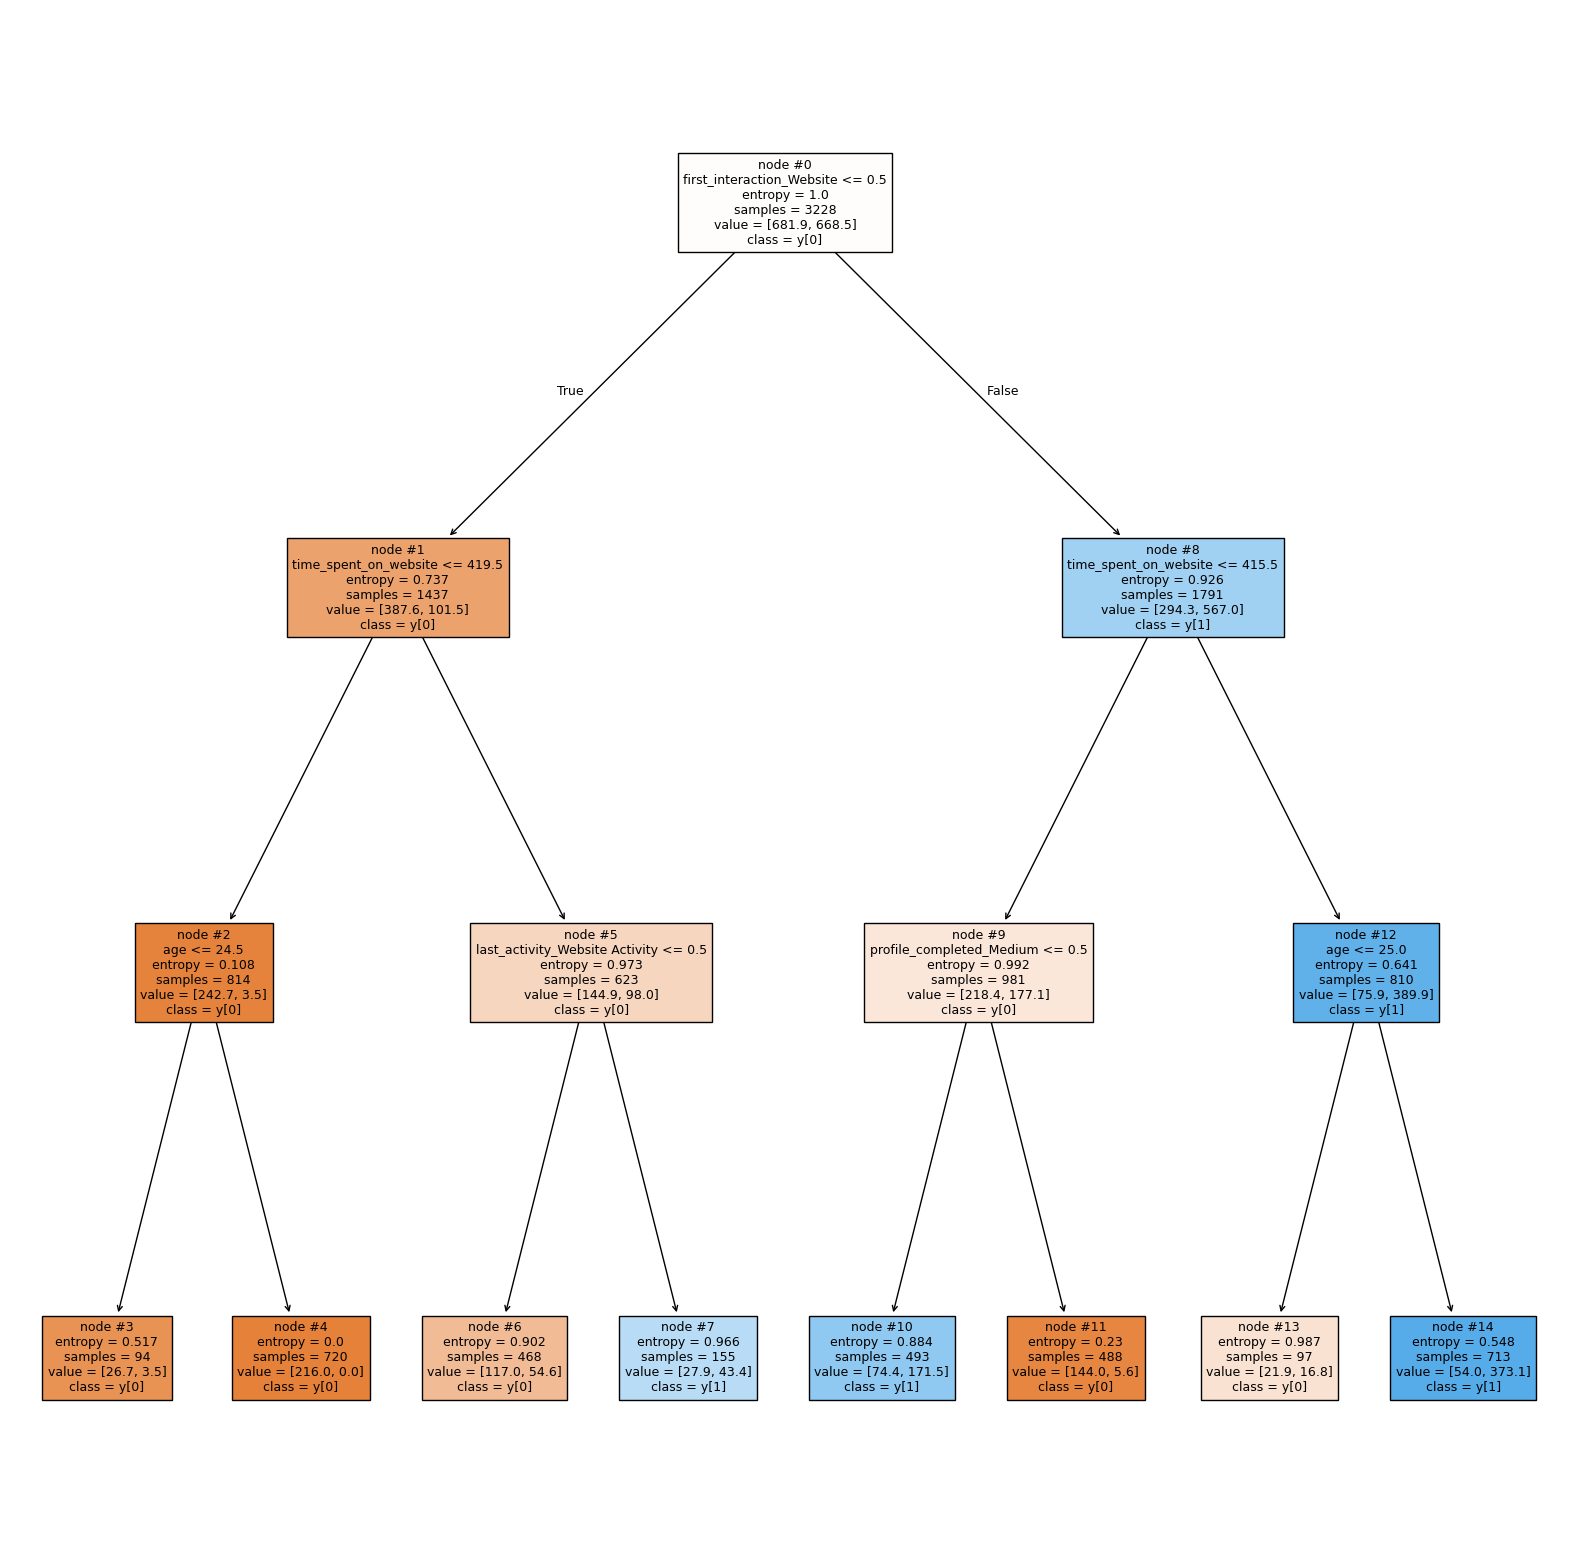

In [70]:
# Extracts all the column names as a list of features.
features = list(X.columns)
# Set figure size.
plt.figure(figsize = (20, 20))
# Plot the decision tree.
tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)
# Show the plot.
plt.show()

**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

🔬 **Observations**

- **Tree Structure**
    - The root split is on **`first_interaction_Website`**, making it the most important feature in determining class.  
    - For users with **no website interaction (`<= 0.5`)**:
        - Predictions are mostly **class 0**, unless the user spent significant time on the website **AND** showed website activity, which leads to **class 1**.  
    - For users with **website interaction (`> 0.5`)**:
        - If **time spent is low (`<= 415.5`)**:
            - Outcomes depend on **profile completion**:
                - **Incomplete profiles → class 1**  
                - **Medium profile completion → class 0**  
        - If **time spent is high (`> 415.5`)**:
            - **Younger users (≤ 25)** → class 0  
            - **Older users (> 25)** → class 1  

- **Interpretability**
    - The tree is relatively shallow and easy to interpret.  
    - Key behavioral drivers:
        - **Website interaction** (first split, highest influence).  
        - **Time spent on website**.  
        - **Engagement indicators** like last activity and profile completion.  

---

⚠️ **Key Takeaway**

- The model relies heavily on **digital engagement behavior** (first interaction, time spent, last activity).  
- **Profile completion** and **age** provide secondary refinement.  
- While the rules are easy to explain, such simple splits may limit generalization, risking **overfitting on specific thresholds**.  

##### **3.2. Feature Importance**

In [74]:
# Print importance of features in the tree building.
print(pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.34814
first_interaction_Website      0.32718
profile_completed_Medium       0.23927
age                            0.06389
last_activity_Website Activity 0.02151
website_visits                 0.00000
page_views_per_visit           0.00000
current_occupation_Student     0.00000
current_occupation_Unemployed  0.00000
profile_completed_Low          0.00000
last_activity_Phone Activity   0.00000
print_media_type1_Yes          0.00000
print_media_type2_Yes          0.00000
digital_media_Yes              0.00000
educational_channels_Yes       0.00000
referral_Yes                   0.00000


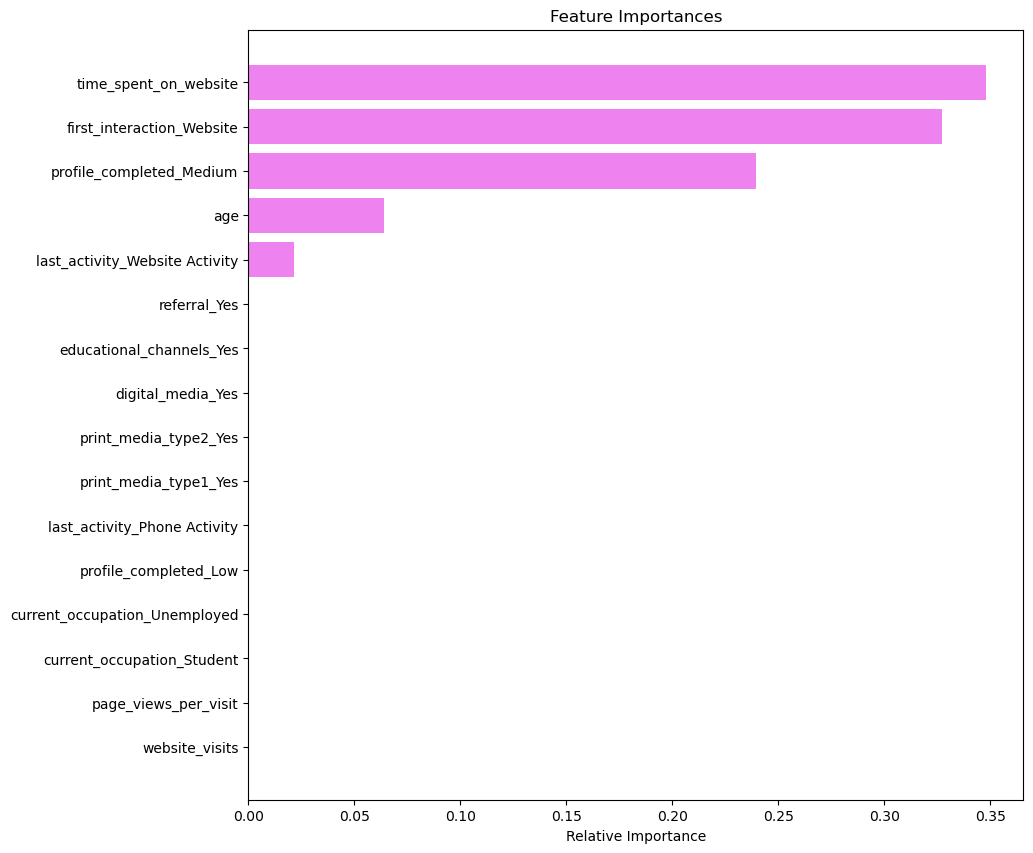

In [75]:
# Get importance data.
importances = d_tree_tuned.feature_importances_
# Get the indices of the importances.
indices = np.argsort(importances)
# Set figure size.
plt.figure(figsize = (10, 10))
# Set the title.
plt.title('Feature Importances')
# Set each bar.
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
# Set the y ticks.
plt.yticks(range(len(indices)), [features[i] for i in indices])
# Set the x label.
plt.xlabel('Relative Importance')
# Show the plot.
plt.show()

🔬 **Observations**

- **Feature Importance**
    - The most influential features are:
        - **Time Spent on Website (0.35)** → Strongest predictor of outcome.  
        - **First Interaction: Website (0.33)** → Almost as critical as time spent.  
        - **Profile Completed: Medium (0.24)** → Adds significant predictive power.  
    - Secondary contributors:
        - **Age (0.06)** → Provides some refinement but limited compared to engagement features.  
        - **Last Activity: Website Activity (0.02)** → Minimal but non-negligible signal.  
    - All other features (e.g., website visits, page views per visit, occupations, print/digital media, referrals) contribute **zero importance** in this model.  

- **Interpretability**
    - The model is driven almost entirely by **user engagement behavior** (time spent, first interaction, profile completion).  
    - **Demographics and marketing channel features** (occupation, media, referrals) add no predictive value in this case.  

---

⚠️ **Key Takeaway**  
- The model suggests that **digital engagement** is the primary determinant of class prediction.  
- **Profile completion** also plays an important role, while demographic or marketing channel variables do not contribute meaningfully.  
- This indicates that focusing on **how users engage with the platform** is far more valuable than who they are demographically or where they came from.  

### **iii. Random Forest**

#### **1. Modelling**

In [79]:
# Create a Random Forest Tree Classifier model.
rf_estimator = RandomForestClassifier(random_state = 7, criterion = "entropy")
# Fit the classifier on the training data.
rf_estimator.fit(X_train,y_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



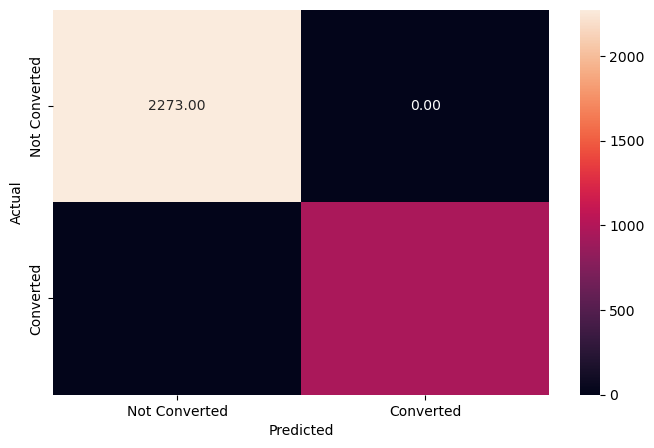

In [80]:
# Predict based on training data.
y_pred_train3 = rf_estimator.predict(X_train)
# Evaluate the model.
get_metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       962
           1       0.81      0.70      0.75       422

    accuracy                           0.86      1384
   macro avg       0.84      0.81      0.83      1384
weighted avg       0.86      0.86      0.86      1384



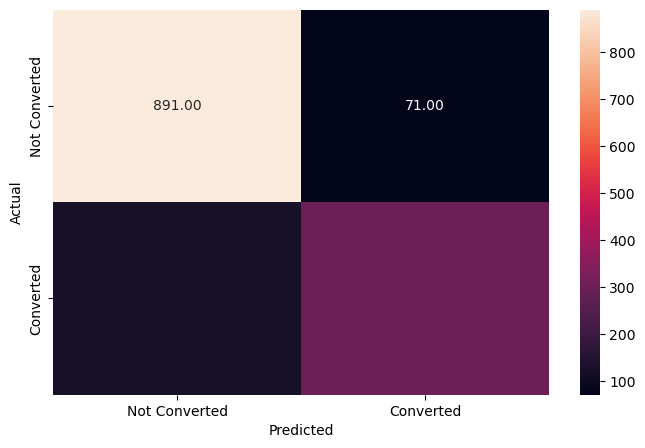

In [81]:
# Predict based on test data.
y_pred_test3 = rf_estimator.predict(X_test)
# Evaluate the model.
get_metrics_score(y_test, y_pred_test3)

🔬 **Observations**

- **Training Performance**
    - The model achieves a **perfect score (1.00 precision, recall, f1, and accuracy)** on the training data.  
    - This indicates excellent fit on the training set, but also raises the possibility of **overfitting**.  

- **Test Performance**
    - **Overall accuracy: 0.86** → Strong generalization, but not perfect.  
    - **Class 0 (Majority Class)**  
        - Precision: 0.88 → High likelihood predictions for class 0 are correct.  
        - Recall: 0.93 → Very effective at capturing most true class 0 instances.  
        - F1-score: 0.90 → Balanced performance.  
    - **Class 1 (Minority Class)**  
        - Precision: 0.81 → Most class 1 predictions are correct.  
        - Recall: 0.70 → Lower sensitivity, meaning the model **misses ~30%** of true class 1 instances.  
        - F1-score: 0.75 → Indicates room for improvement in detecting class 1.  

- **Macro vs Weighted Averages**
    - **Macro Avg (0.83 f1)** → Accounts for class imbalance and shows that minority class performance drags down the overall balance.  
    - **Weighted Avg (0.86 f1)** → Close to accuracy, reflecting the majority class dominance.  

---

⚠️ **Key Takeaway**  
- The Random Forest model is **highly accurate overall (86%)**, but suffers from **class imbalance issues**.  
- It performs very well for the **majority class (0)** but **struggles with recall on the minority class (1)**, leading to missed positive cases.  
- Future improvements could focus on:  
  - Class rebalancing (SMOTE, undersampling, class weights).  
  - Hyperparameter tuning to improve recall for class 1.  
  - Exploring alternative models (e.g., Gradient Boosting, XGBoost) for better minority class detection.  

#### **2. Hyperparameter Tuning**

In [84]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)
# Set parameters.
parameters = {"n_estimators": [110, 120], "max_depth": [6, 7], "min_samples_leaf": [20, 25], "max_features": [0.8, 0.9], "max_samples": [0.9, 1], "class_weight": ["balanced",{0: 0.3, 1: 0.7}]}
# Set the type of scoring to compare parameter combinations.
scorer = metrics.make_scorer(recall_score, pos_label = 1)
# Initialize GridSearchCV with the tuned decision tree.
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer, cv=5)
# Fit the grid search object on the training data to find the best hyperparameters.
grid_obj = grid_obj.fit(X_train, y_train)
# Set the classifier to the best combination of parameters.
rf_estimator_tuned = grid_obj.best_estimator_
# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

,n_estimators,120
,criterion,'entropy'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,25
,min_weight_fraction_leaf,0.0
,max_features,0.8
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


              precision    recall  f1-score   support

           0       0.94      0.83      0.88      2273
           1       0.68      0.87      0.76       955

    accuracy                           0.84      3228
   macro avg       0.81      0.85      0.82      3228
weighted avg       0.86      0.84      0.84      3228



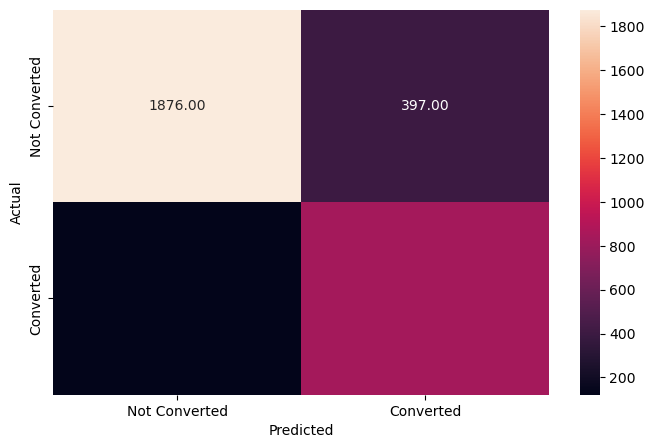

In [85]:
# Predict based on training data.
y_pred_train4 = rf_estimator_tuned.predict(X_train)
# Evaluate the model.
get_metrics_score(y_train, y_pred_train4)

              precision    recall  f1-score   support

           0       0.93      0.83      0.87       962
           1       0.68      0.85      0.76       422

    accuracy                           0.83      1384
   macro avg       0.81      0.84      0.82      1384
weighted avg       0.85      0.83      0.84      1384



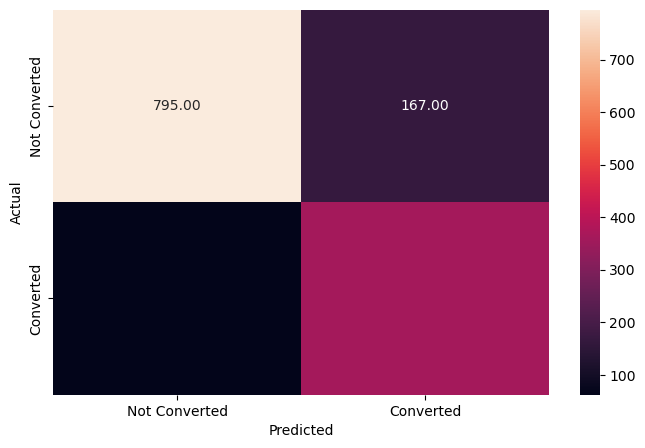

In [86]:
# Predict based on test data.
y_pred_test4 = rf_estimator_tuned.predict(X_test)
# Evaluate the model.
get_metrics_score(y_test, y_pred_test4)

🔬 **Observations**

- **Training Performance**
    - **Accuracy: 0.84** → Higher than Decision Tree, showing stronger predictive power while avoiding overfitting.
    - **Class 0 (Majority Class)**
        - Precision: 0.94 → Predictions for class 0 are very reliable.
        - Recall: 0.83 → Captures most class 0 instances, better balance than Decision Tree.
        - F1-score: 0.88 → Strong performance.
    - **Class 1 (Minority Class)**
        - Precision: 0.68 → More moderate precision, but slightly higher than Decision Tree.
        - Recall: 0.87 → Very strong sensitivity, nearly all positives are detected.
        - F1-score: 0.76 → A solid balance between precision and recall.

- **Test Performance**
    - **Accuracy: 0.83** → Slightly lower than training, but generalization is consistent.
    - **Class 0**
        - Precision: 0.93 → High reliability for predicting negatives.
        - Recall: 0.83 → Consistent with training recall.
        - F1-score: 0.87 → Balanced and strong.
    - **Class 1**
        - Precision: 0.68 → Moderate, some false positives remain.
        - Recall: 0.85 → Maintains high sensitivity on unseen data.
        - F1-score: 0.76 → Mirrors training results closely.

- **Macro vs Weighted Averages**
    - **Macro Avg (F1 ≈ 0.82)** → Confirms balanced performance across classes.
    - **Weighted Avg (F1 ≈ 0.84)** → Reflects consistency with overall accuracy, even under class imbalance.

---

⚠️ **Key Takeaway**  
- The **tuned Random Forest** outperforms the Decision Tree in **overall accuracy (83% vs. 80%)** while maintaining strong recall for the minority class.
- It achieves a **better balance of precision and recall** compared to the Decision Tree, making it more reliable across both classes.  
- Especially effective when **both accuracy and minority class detection are important**.
- Further improvements could include:
  - Hyperparameter tuning for even better precision on class 1.
  - Cost-sensitive learning or class weighting to reduce false positives.
  - Trying ensemble variants like **Gradient Boosting** or **XGBoost** for potentially higher gains.

#### **3. Visualization**

In [89]:
# Print importance of features in the forest building.
print(pd.DataFrame(rf_estimator_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                   Imp
time_spent_on_website          0.30058
first_interaction_Website      0.28131
profile_completed_Medium       0.20011
age                            0.04800
last_activity_Phone Activity   0.03890
current_occupation_Unemployed  0.03712
current_occupation_Student     0.03542
last_activity_Website Activity 0.02991
page_views_per_visit           0.01549
website_visits                 0.00971
educational_channels_Yes       0.00160
profile_completed_Low          0.00142
print_media_type1_Yes          0.00036
digital_media_Yes              0.00007
print_media_type2_Yes          0.00000
referral_Yes                   0.00000


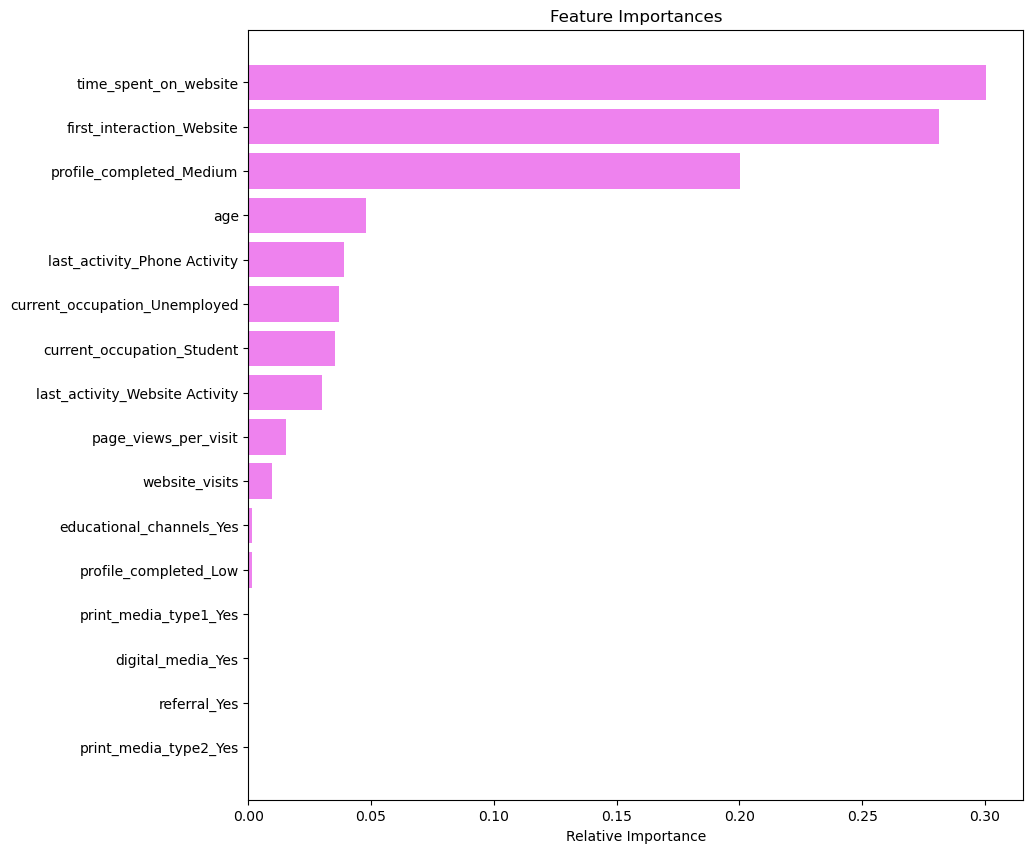

In [90]:
# Get importance data.
importances = rf_estimator_tuned.feature_importances_
# Get the indices of the importances.
indices = np.argsort(importances)
# Extracts all the column names as a list of features.
features = list(X.columns)
# Set figure size.
plt.figure(figsize = (10, 10))
# Set the title.
plt.title('Feature Importances')
# Set each bar.
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
# Set the y ticks.
plt.yticks(range(len(indices)), [features[i] for i in indices])
# Set the x label.
plt.xlabel('Relative Importance')
# Show the plot.
plt.show()

🔬 **Feature Importance – Tuned Random Forest**

- **Top Predictors**  
    - **`time_spent_on_website` (0.3006)** → Strongest predictor, indicating that higher engagement with the website is highly associated with conversion/target outcome.  
    - **`first_interaction_Website` (0.2813)** → Early website interaction is nearly as important, reinforcing the significance of digital engagement.  
    - **`profile_completed_Medium` (0.2001)** → Completion level of the user profile plays a critical role in prediction.  

- **Moderately Important Features**  
    - **`age` (0.0480)** → Demographics matter but have much less predictive power than online behavior.  
    - **`last_activity_Phone Activity` (0.0389)** and **`current_occupation_Unemployed` (0.0371)** → These behavioral and demographic indicators contribute moderately.  
    - **`current_occupation_Student` (0.0354)** and **`last_activity_Website Activity` (0.0299)** → Suggest that user occupation and recent activities are meaningful but secondary.  

- **Low Impact Features**  
    - **`page_views_per_visit` (0.0155)** and **`website_visits` (0.0097)** → Indicators of browsing intensity, but surprisingly weaker predictors than time spent.  
    - **Channels & Media Exposure (`educational_channels_Yes`, `print_media_type1_Yes`, `digital_media_Yes`)** → Minimal impact, suggesting external channels are far less influential than direct website interaction.  

- **Negligible Predictors**  
    - **`print_media_type2_Yes`** and **`referral_Yes`** both register **0 importance**, implying they do not contribute to the model’s predictive ability.  

---

⚠️ **Key Takeaway**  
- **User engagement on the website (time spent, first interaction, profile completion)** dominates predictive power.  
- **Demographics (age, occupation)** and **specific activities (phone or web)** matter moderately.  
- **External factors (media, referral sources)** contribute almost nothing to the model.  
- Future efforts should **prioritize enhancing website engagement features** and possibly **simplify or drop negligible variables** to streamline the model.  


## **V. Actionable Insights and Recommendations**

###  🔨 **Conclusion**

The tuned Random Forest model shows strong predictive ability with an **accuracy of ~83–84%** on both training and test sets, and balanced performance across precision, recall, and F1-score.  

The **feature importance analysis** highlights that prediction is driven mainly by **website engagement metrics** (time spent on the website, first interaction, and profile completion). Demographic variables (age, occupation) and recent activities (phone or website activity) contribute moderately, while external media exposure and referral sources have negligible impact.  

Overall, the model suggests that **digital behavior within the platform is the most reliable indicator of user conversion or engagement**, far outweighing offline or referral-based factors.  

---

### 👍 **Recommendations**

1. **Focus on Website Engagement**
   - Enhance features that increase **time spent on site** (e.g., personalized content, interactive tools, recommendation systems).
   - Optimize the **onboarding process** so that first interactions with the website are seamless and engaging.
   - Encourage **profile completion** through gamification, reminders, or incentives.

2. **Leverage Moderate Predictors**
   - Use **occupation and activity patterns** for targeted segmentation (e.g., student-oriented campaigns, reactivation strategies for phone users).
   - Consider **age-based personalization** to align with different user preferences.

3. **Streamline Feature Set**
   - Drop or deprioritize negligible predictors (print media, referral sources, digital media flags) as they add little value to the model.  
   - This simplification can improve model efficiency and interpretability without losing predictive power.

4. **Business Strategy Alignment**
   - Invest more in **digital channels and platform improvements**, as they clearly drive engagement and conversions.
   - Reconsider investments in **print media or referral programs**, since their predictive influence is near zero.

---

### 🚀 **Next Steps**  

- Conduct **A/B testing** on engagement-focused strategies to validate causal impact.  
- Explore **feature engineering** around website interaction (e.g., session duration trends, clickstream analysis).  
- Monitor **model drift** over time to ensure predictors remain relevant as user behavior evolves.  